# Installation and Visualization

## First Steps

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip3 install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
!pip install nilearn

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 3.0.2
    Uninstalling nibabel-3.0.2:
      Successfully uninstalled nibabel-3.0.2


In [ ]:
from nilearn import image
from nilearn import plotting

# getting rest image from Patient 29006
smoothed_img = image.smooth_img('drive/MyDrive/rest.nii', fwhm = 1)
image.get_data(smoothed_img)
print(type(smoothed_img))
print(smoothed_img.affine)
print(smoothed_img.header)

<class 'nibabel.nifti1.Nifti1Image'>
[[-3.75000000e+00  6.50163961e-22 -1.35525272e-20  1.16938728e+02]
 [-6.51818323e-22  3.75000000e+00  1.08420217e-19 -1.46247482e+02]
 [ 0.00000000e+00 -5.42101086e-20  4.00000000e+00 -1.04225983e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  50 120   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    3.75  3.75  4.    0.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1959.0
cal_min         : 0.0
slice_duration  : 0.0
toffset     

(64, 64, 50, 120)


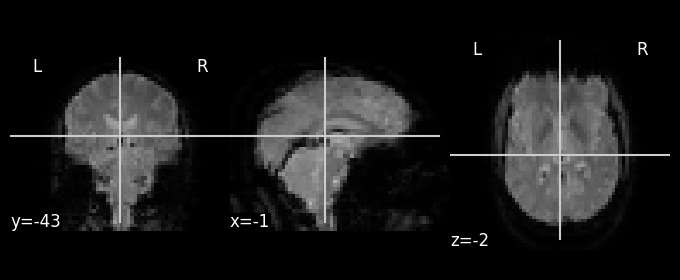

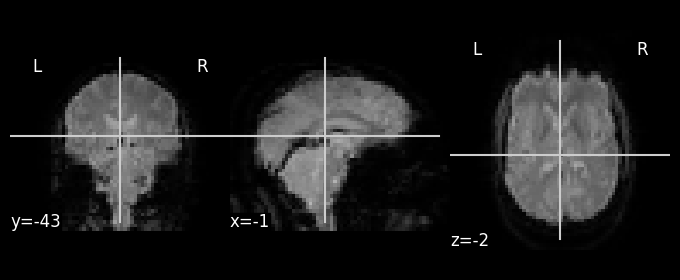

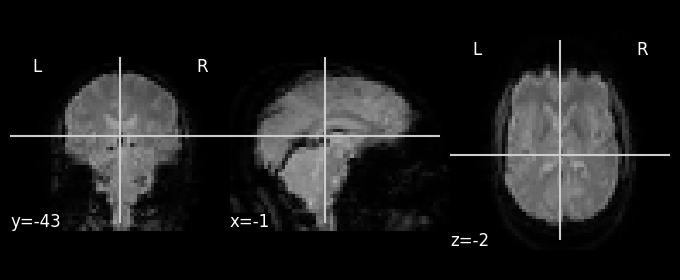

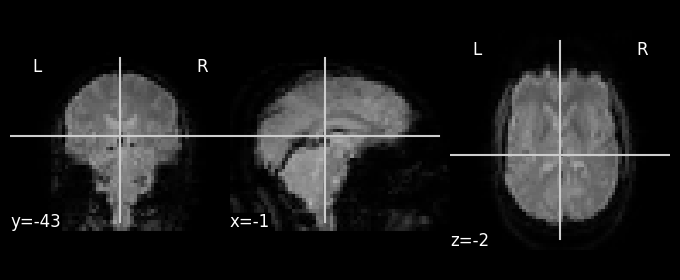

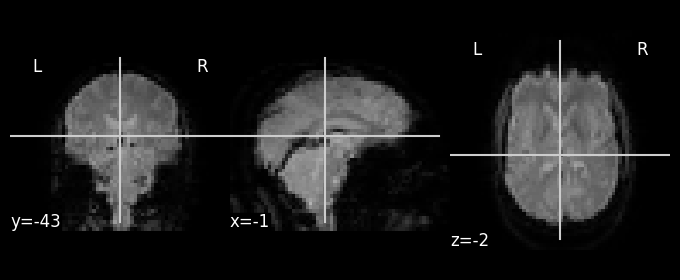

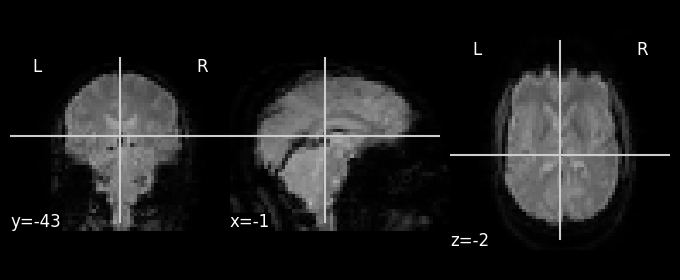

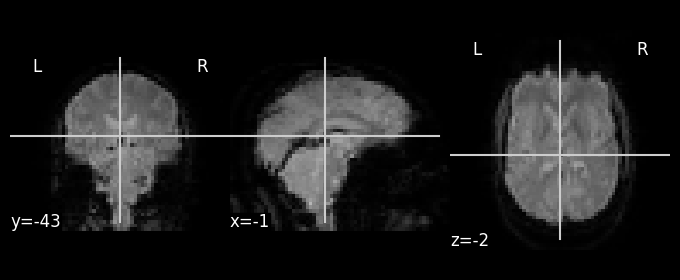

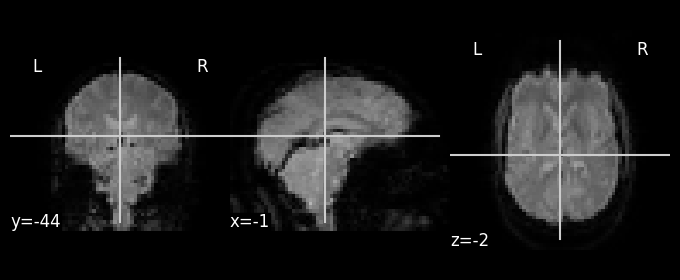

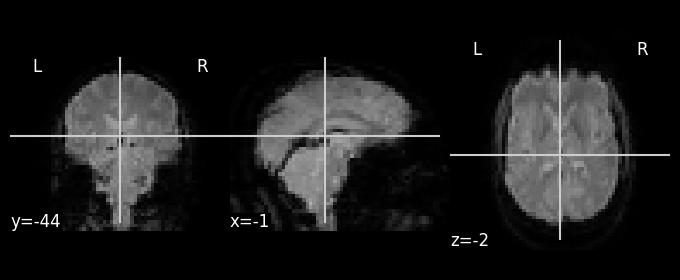

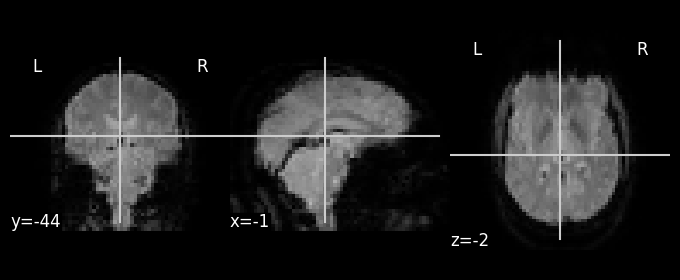

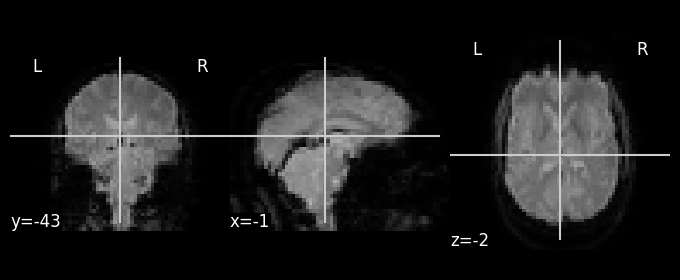

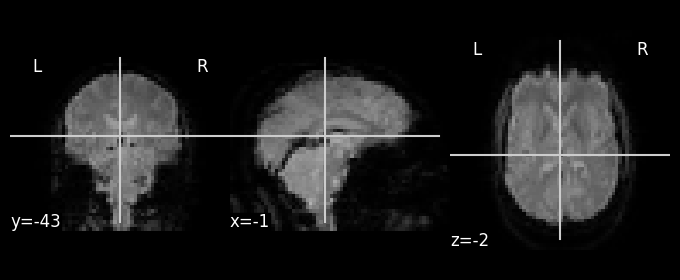

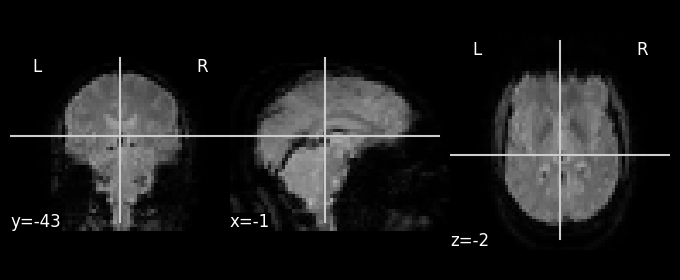

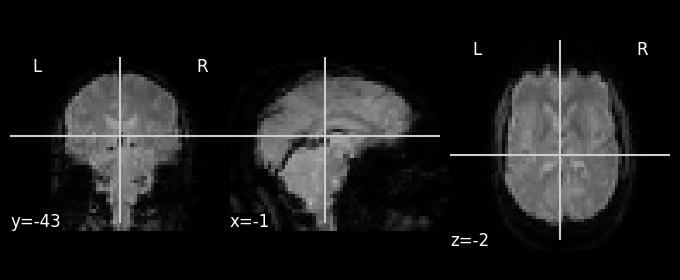

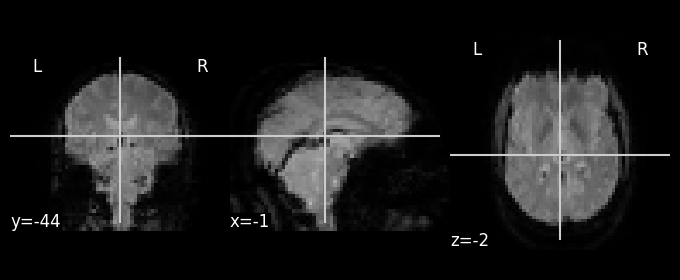

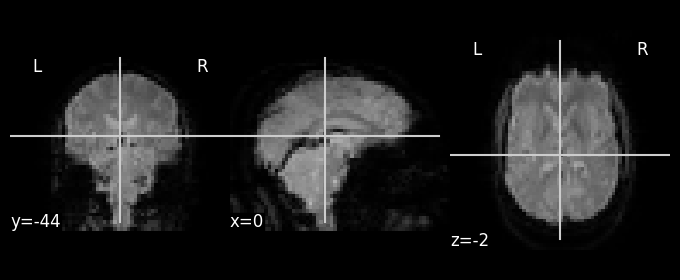

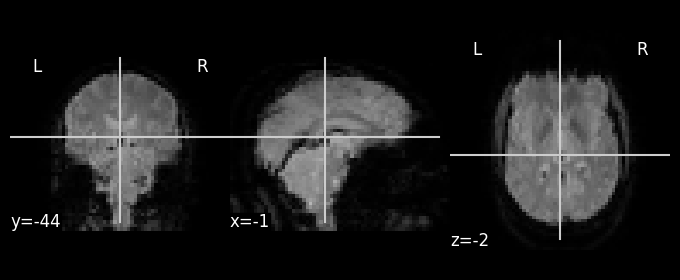

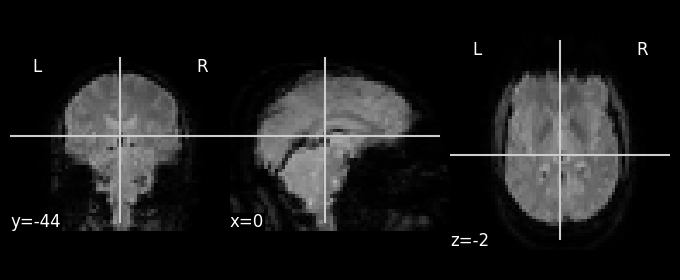

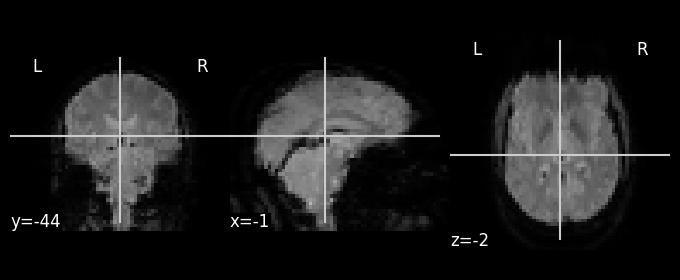

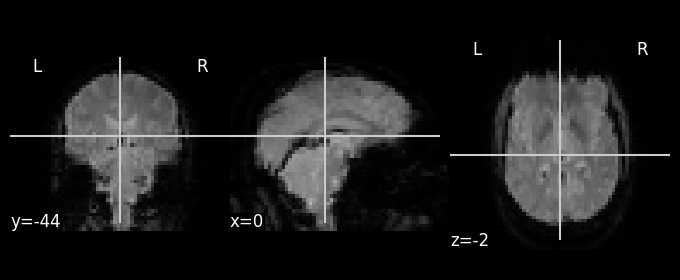

In [ ]:
print(image.load_img(smoothed_img).shape)  ##Look at this and reduce

for i in range(20):
  still = image.index_img(smoothed_img, i)
  plotting.plot_anat(still)

## Harvard-Oxford Atlas

In [ ]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels[1:]
print(labels)
print(len(labels))


Dataset created in /root/nilearn_data/fsl



Downloaded 21905408 of 25716861 bytes (85.2%,    0.5s remaining) ...done. (5 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/245b1ae3f43e3ea47e2ed9f438694f4a/HarvardOxford.tgz...

['Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)', 'Subcallosal Cortex', 'Paracingulate Gyrus', 'Cing

.. done.


In [ ]:
labels

['Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallosal Cortex',
 '

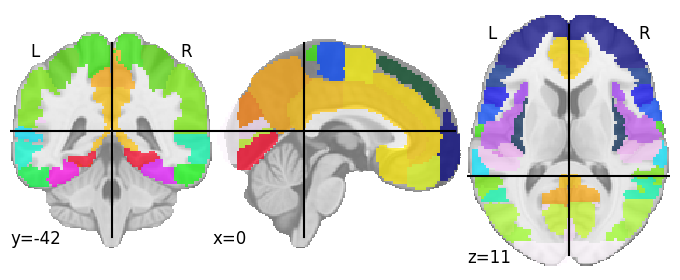

In [ ]:
from nilearn import plotting
plotting.plot_roi(atlas_filename)

In [ ]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=False)

[[0.15643296 0.91022533 0.21230236 ... 0.67517114 0.96707475 0.89141285]
 [0.14985964 0.89834696 0.20141909 ... 0.6655348  0.9621257  0.8863782 ]
 [0.14804724 0.8932056  0.20048468 ... 0.663305   0.95881057 0.8837226 ]
 ...
 [0.15568215 0.880845   0.23447984 ... 0.65653    0.9471129  0.88128155]
 [0.15527388 0.8787078  0.22452176 ... 0.65585905 0.9436083  0.88129926]
 [0.15332349 0.8842196  0.21753907 ... 0.6588059  0.94922036 0.88527507]]


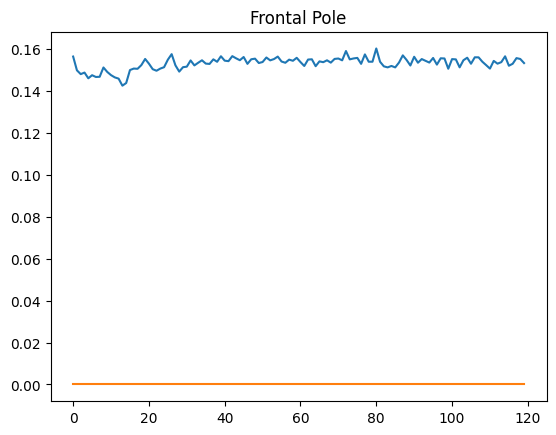

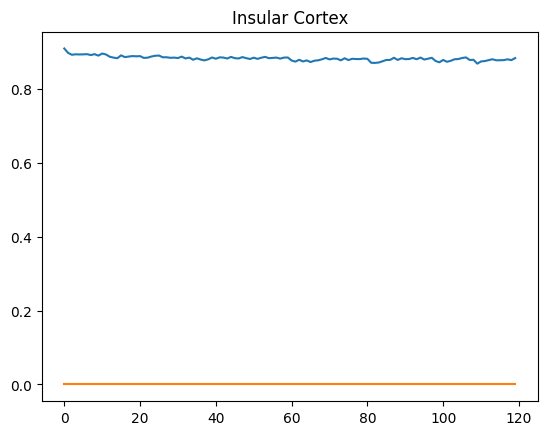

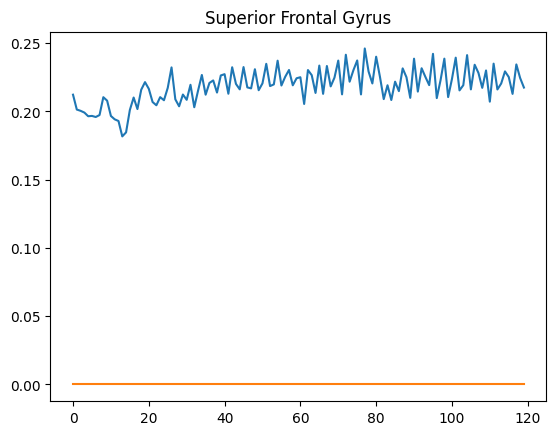

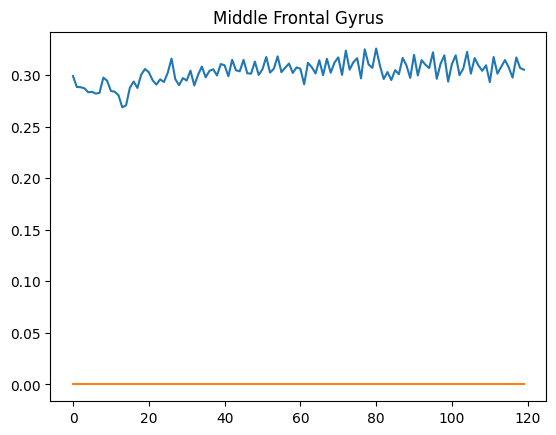

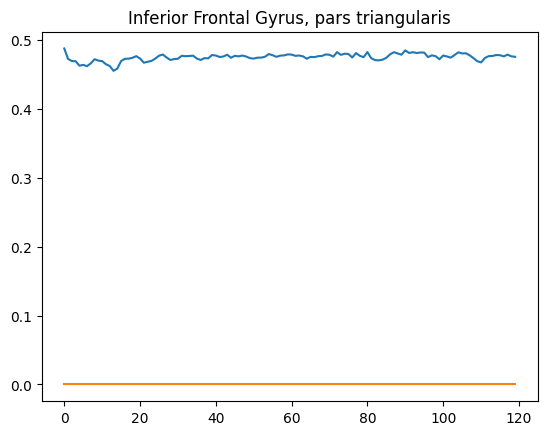

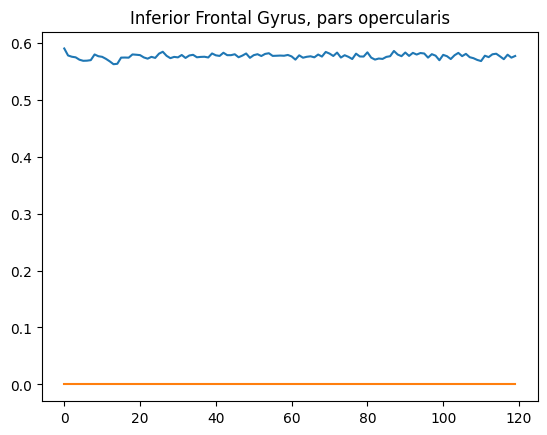

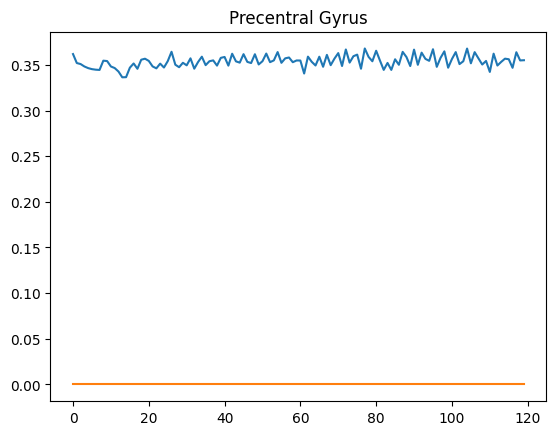

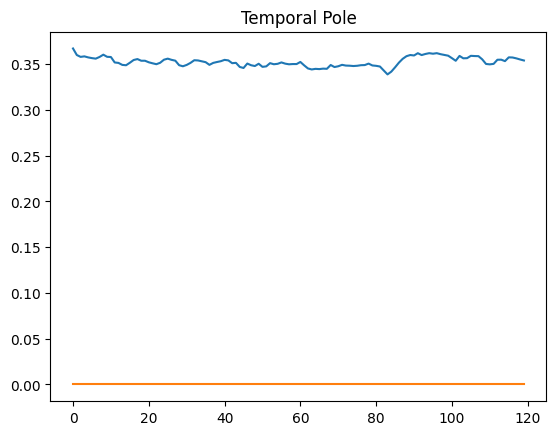

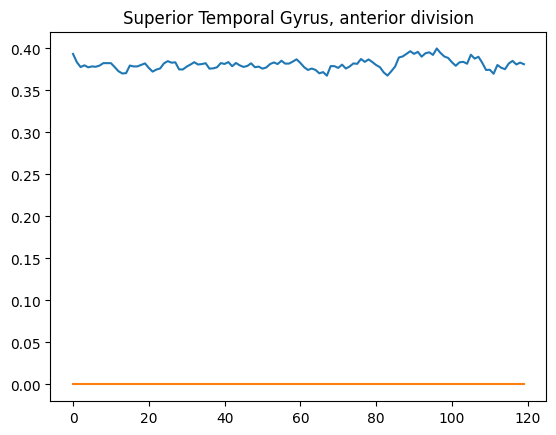

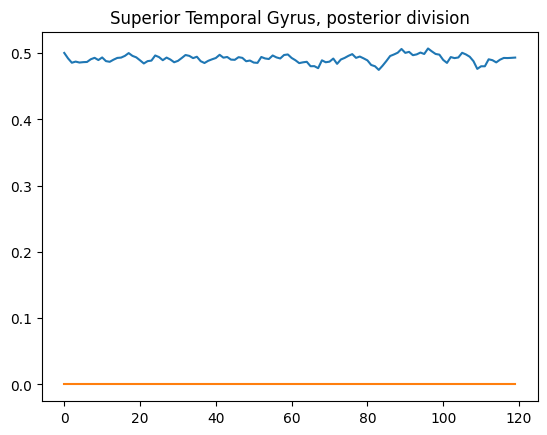

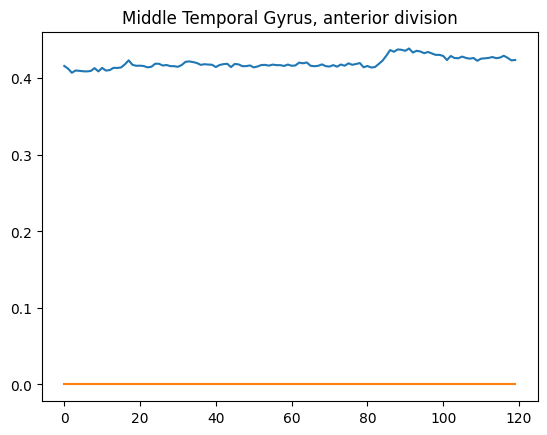

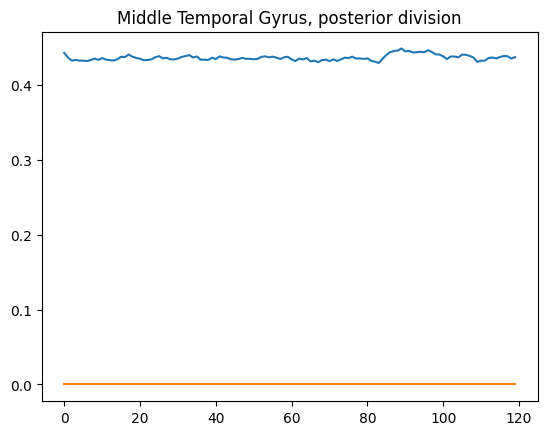

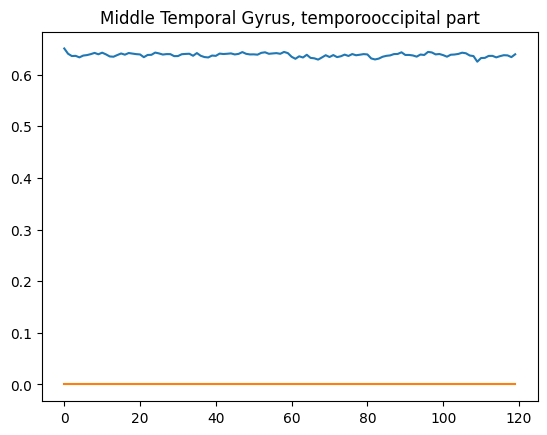

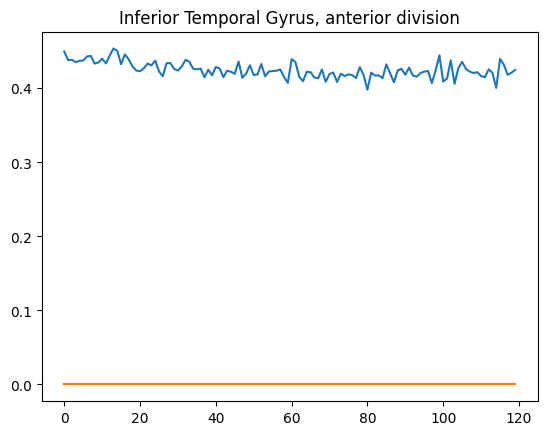

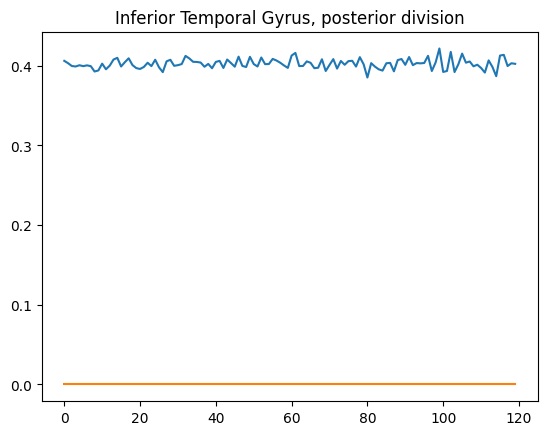

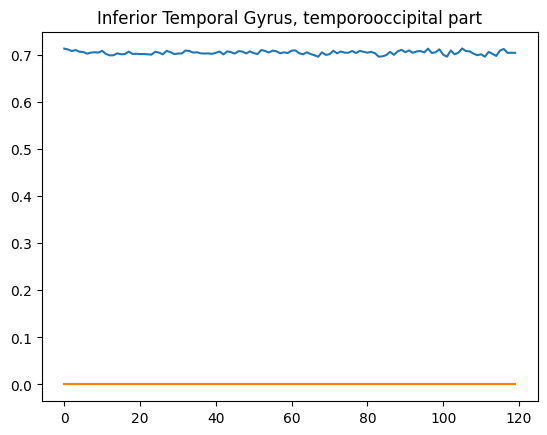

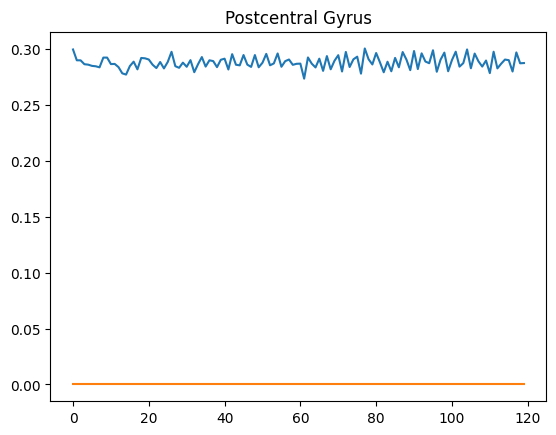

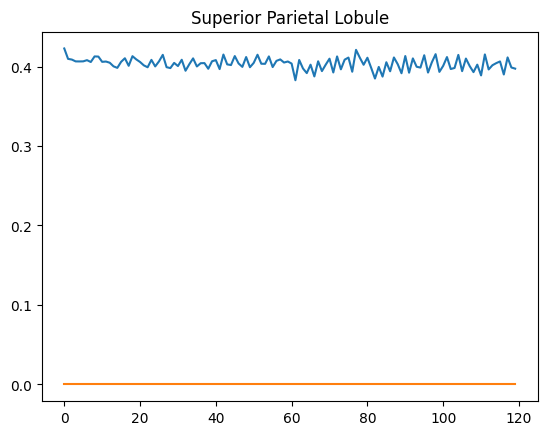

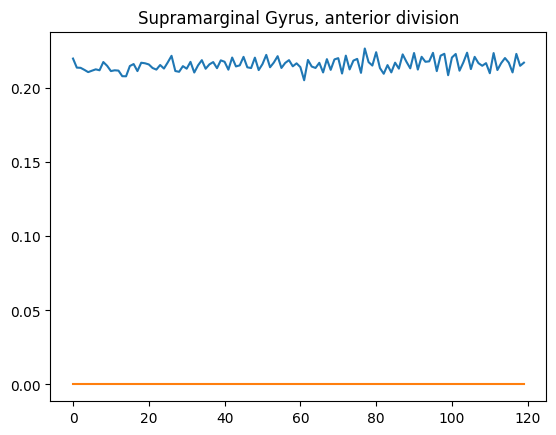

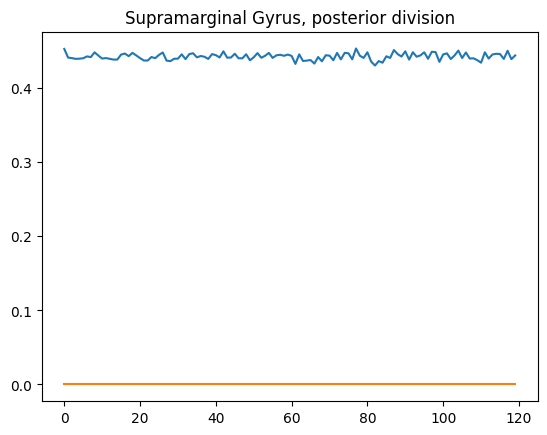

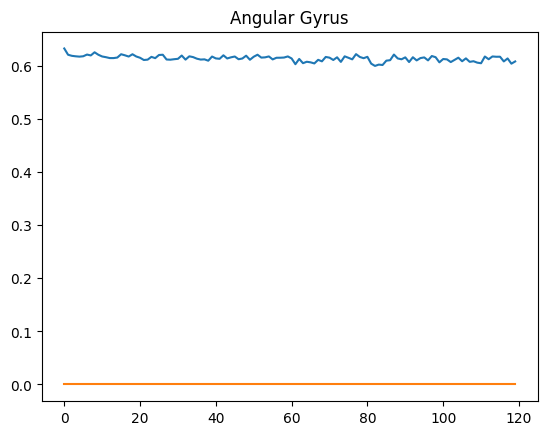

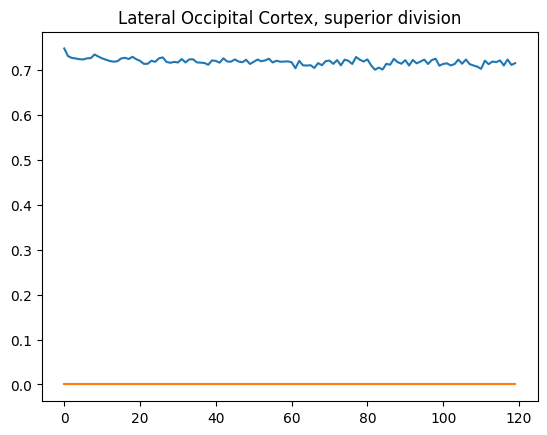

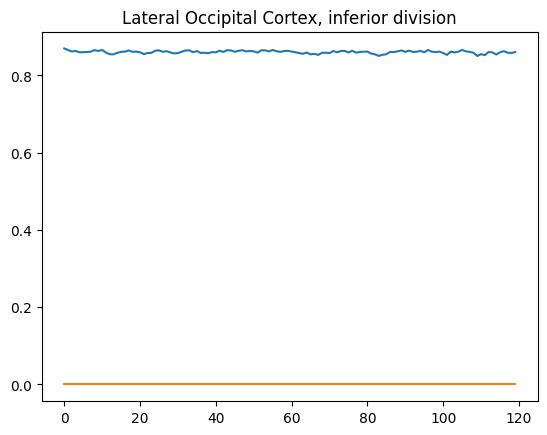

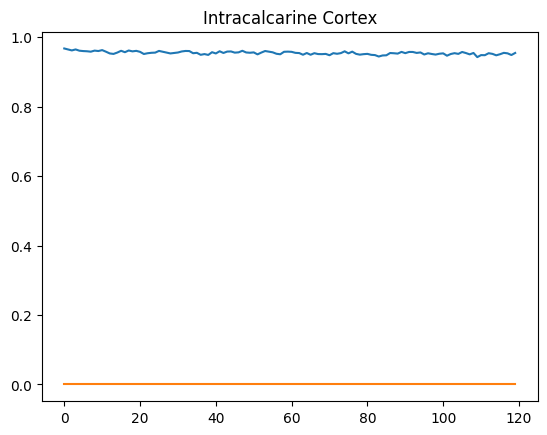

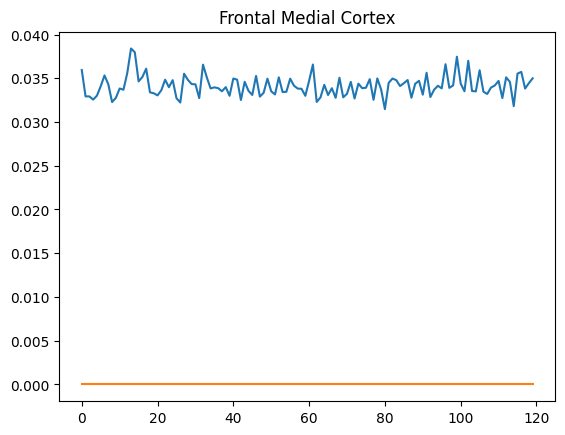

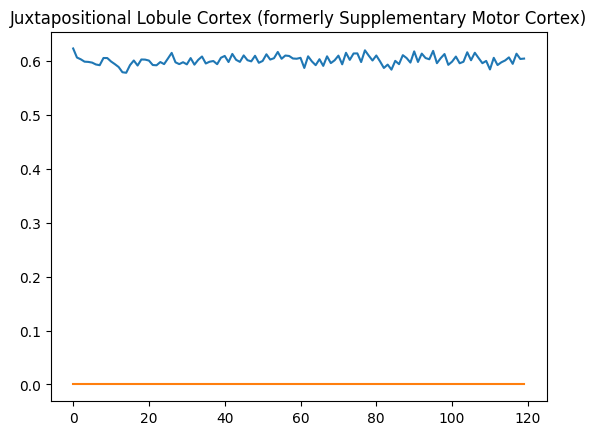

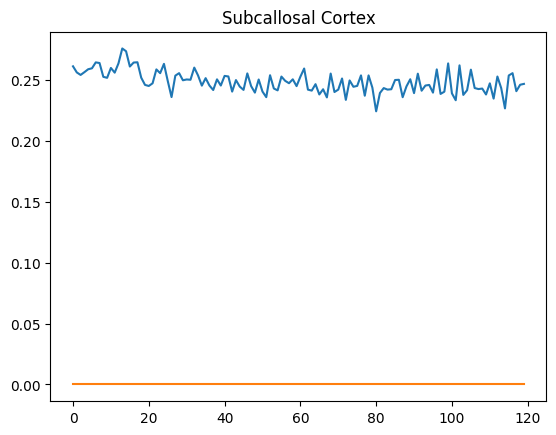

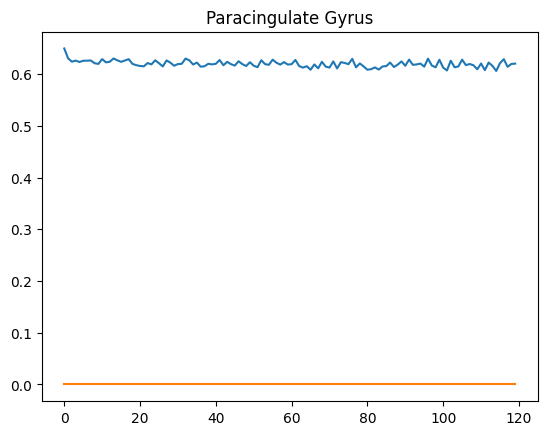

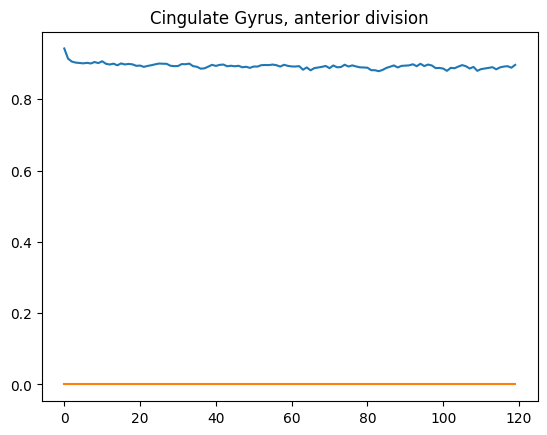

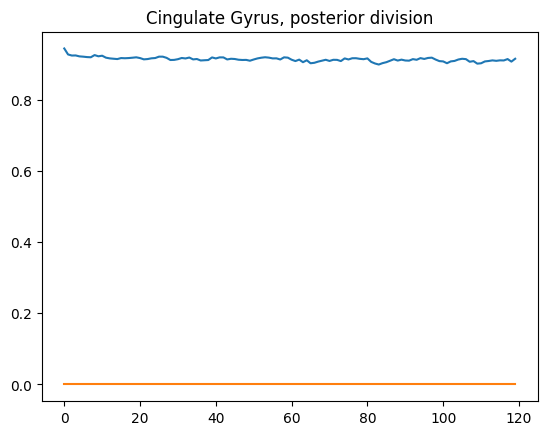

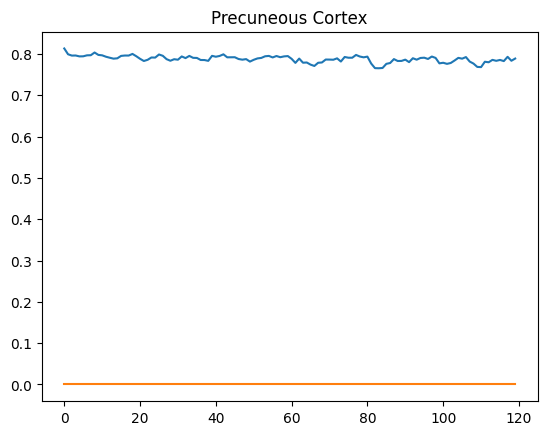

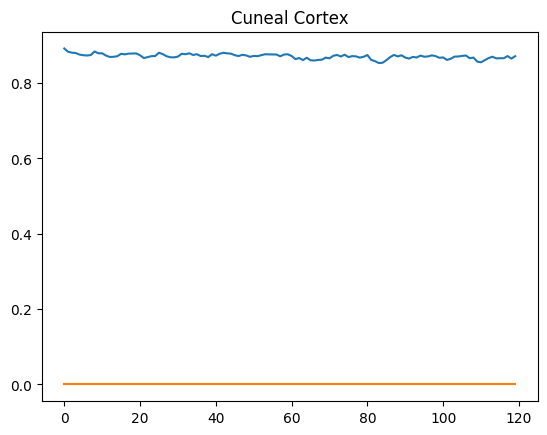

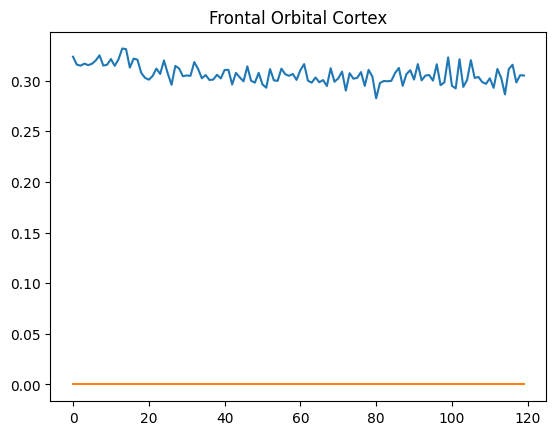

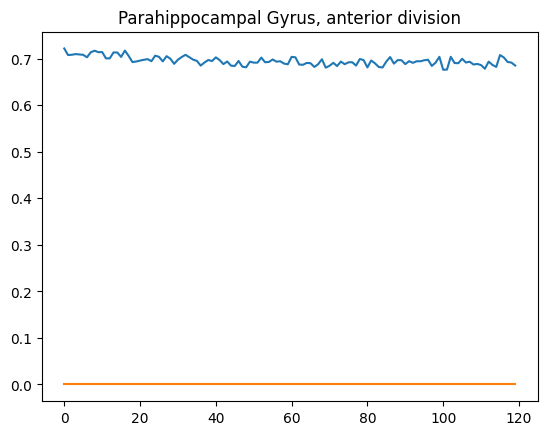

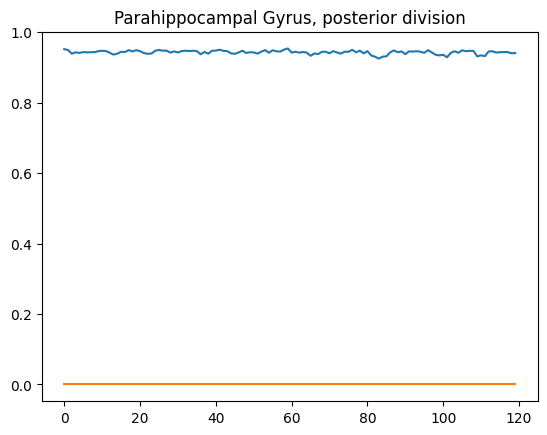

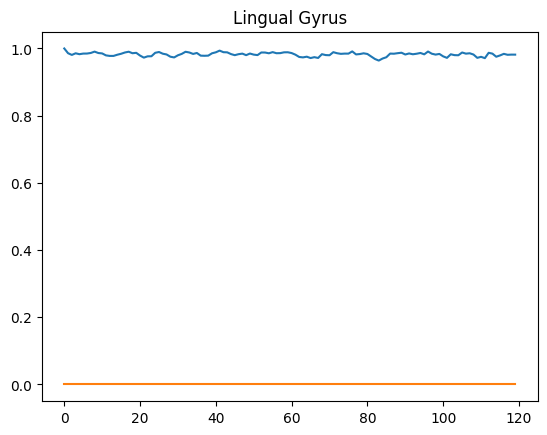

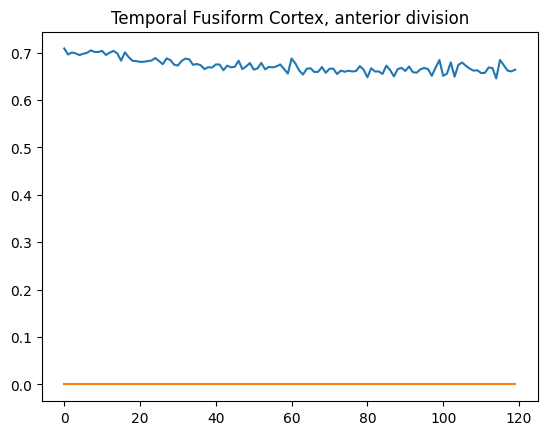

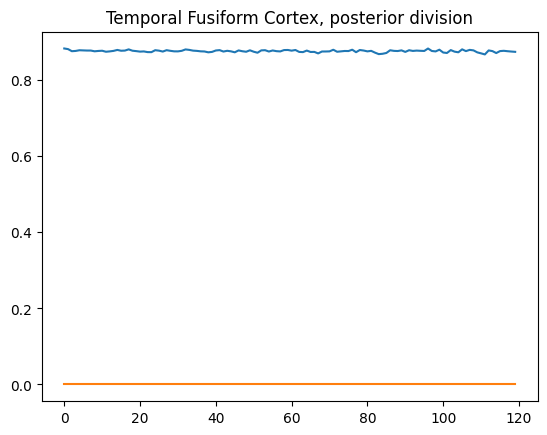

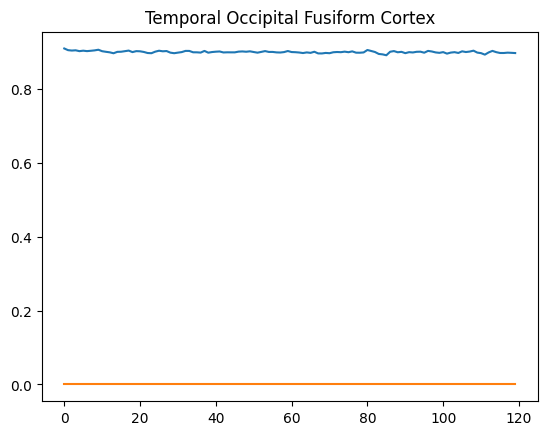

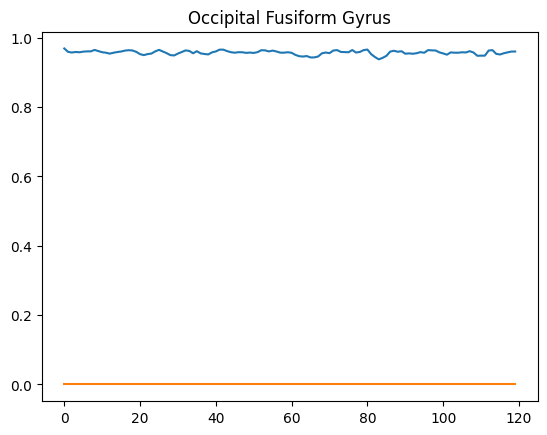

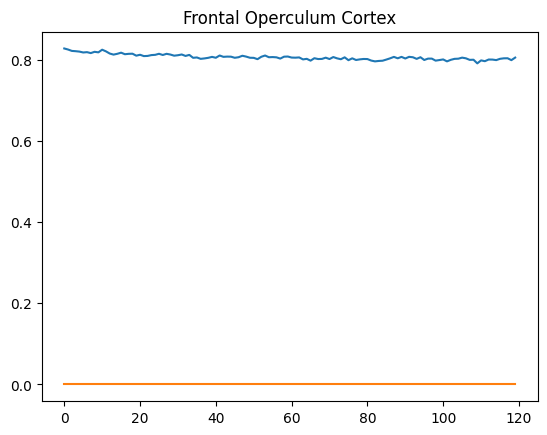

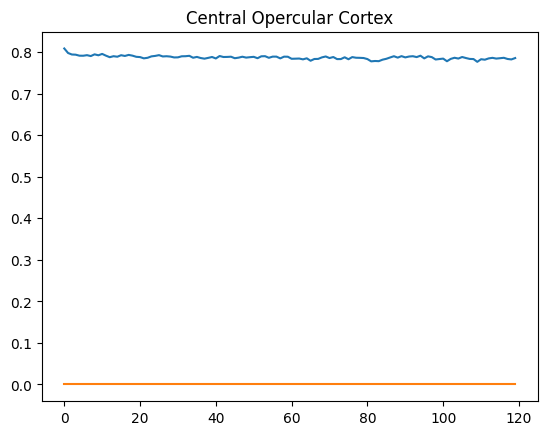

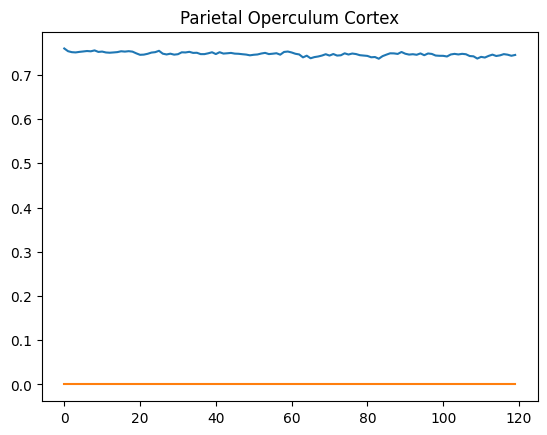

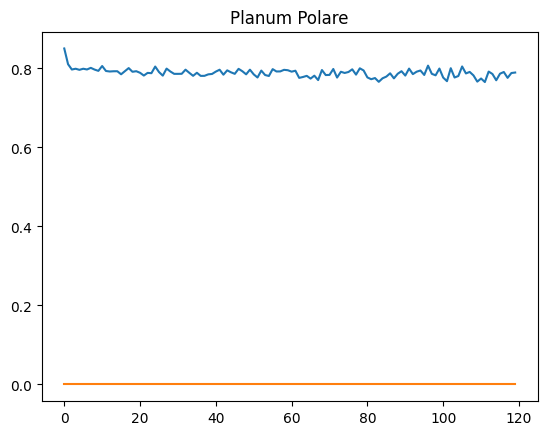

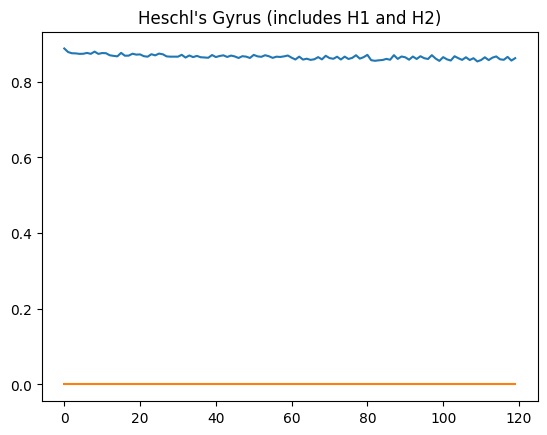

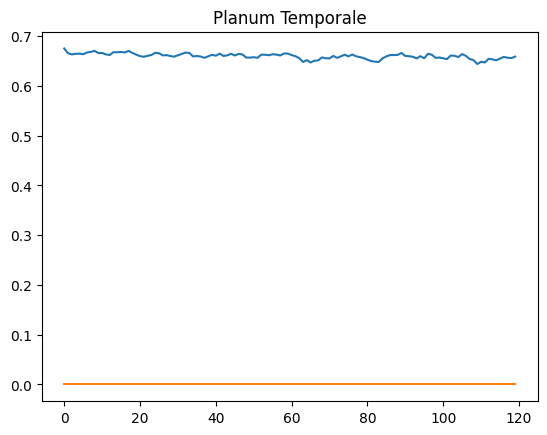

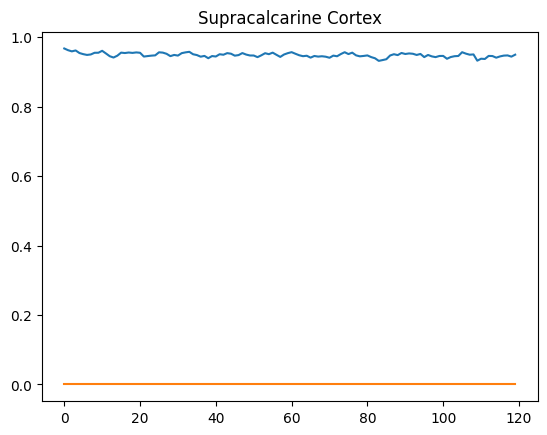

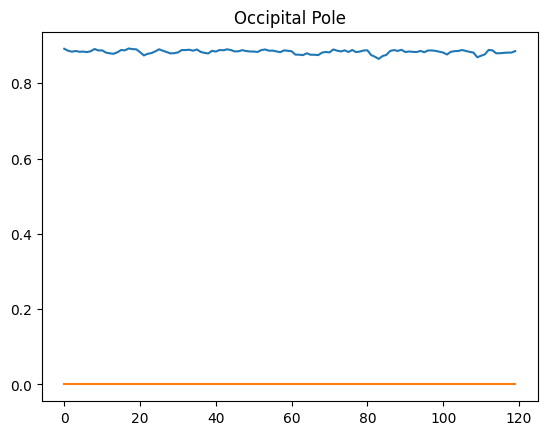



(120, 48)
(48, 120)


In [ ]:
time_series = masker.fit_transform(smoothed_img)

# How best should we normalize this time series?

time_series = time_series/np.max(time_series)
print(time_series)

graph_time_series = time_series.T
for i in range(len(graph_time_series)):
  a = plt.plot(range(120), graph_time_series[i])
  b = plt.plot(range(120), [0]*120)
  plt.title(labels[i])
  plt.show(a, b)

print("\n")
print(time_series.shape)
print(graph_time_series.shape)

## Juelich Atlas

In [ ]:
from nilearn import datasets
dataset2 = datasets.fetch_atlas_juelich('maxprob-thr0-2mm')
atlas_filename2 = dataset2.maps
labels2 = dataset2.labels[1:]
print(labels2)
print(len(labels2))

Downloaded 434176 of 3740787 bytes (11.6%,    7.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/3b315bf4e4eaaa25c79bfe34d43a694b/Juelich.tgz..... done.


['GM Amygdala_centromedial group', 'GM Amygdala_laterobasal group', 'GM Amygdala_superficial group', 'GM Anterior intra-parietal sulcus hIP1', 'GM Anterior intra-parietal sulcus hIP2', 'GM Anterior intra-parietal sulcus hIP3', "GM Broca's area BA44", "GM Broca's area BA45", 'GM Hippocampus cornu ammonis', 'GM Hippocampus dentate gyrus', 'GM Hippocampus entorhinal cortex', 'GM Hippocampus hippocampal-amygdaloid transition area', 'GM Hippocampus subiculum', 'GM Inferior parietal lobule PF', 'GM Inferior parietal lobule PFcm', 'GM Inferior parietal lobule PFm', 'GM Inferior parietal lobule PFop', 'GM Inferior parietal lobule PFt', 'GM Inferior parietal lobule PGp', 'GM Inferior parietal lobule Pga', 'GM Insula Id1', 'GM Insula Ig1', 'GM Insula Ig2', 'GM Lateral geniculate body', 'GM Mamillary body', 'GM Medial geniculate body', 'GM Premotor cortex BA6', 'GM Primary auditory cortex TE1.0', 'GM Primary auditory cortex TE1.1', 'GM Primary auditory cortex TE1.2', 'GM Primary motor cortex BA4a

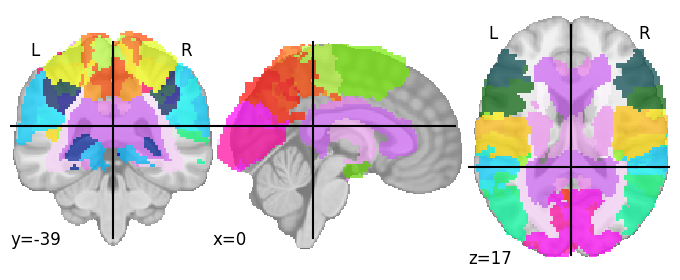

In [ ]:
plotting.plot_roi(atlas_filename2)

In [ ]:
from nilearn.maskers import NiftiLabelsMasker
masker2 = NiftiLabelsMasker(labels_img=atlas_filename2, standardize=True)

[[ 0.2491529   0.5852128   0.31644353 ...  0.37253794  0.3484223
   0.4894323 ]
 [ 0.2940758   0.19395438  0.2834285  ...  0.32308817  0.32158107
   0.30723813]
 [ 0.17008997  0.11552241  0.23373383 ...  0.28795275  0.2738649
   0.22941142]
 ...
 [-0.01678748 -0.06132746 -0.06644426 ... -0.12604995 -0.10011984
  -0.12415412]
 [-0.00660649 -0.10099418 -0.06627647 ... -0.13943486 -0.13411814
  -0.14064696]
 [-0.02397539 -0.08476551 -0.05532798 ... -0.01897067 -0.06970098
  -0.04813286]]


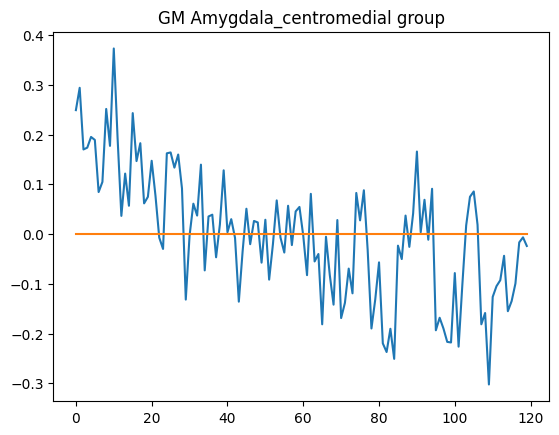

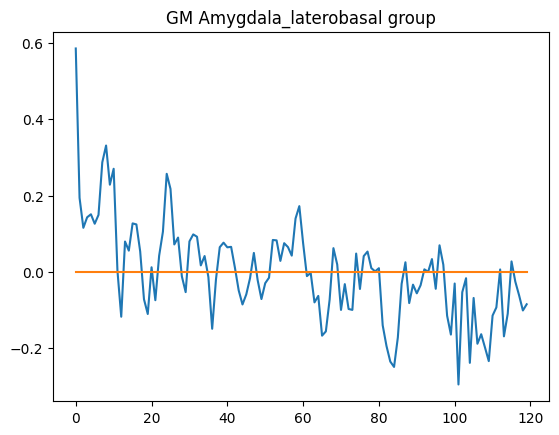

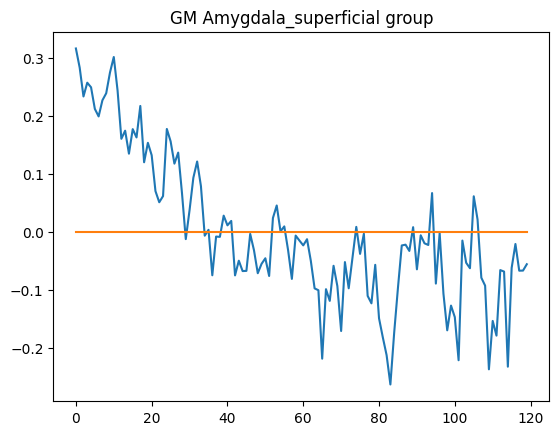

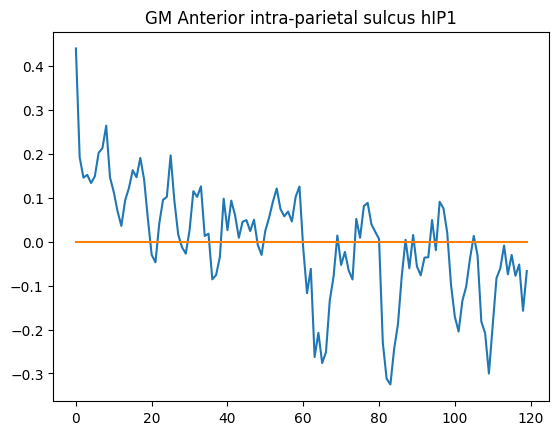

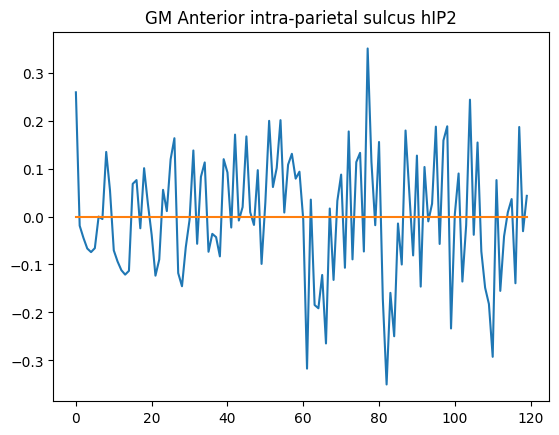

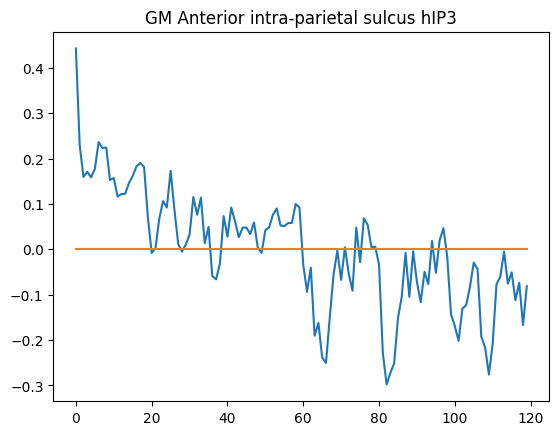

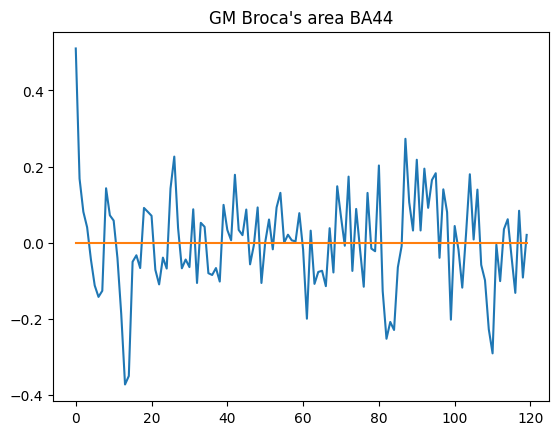

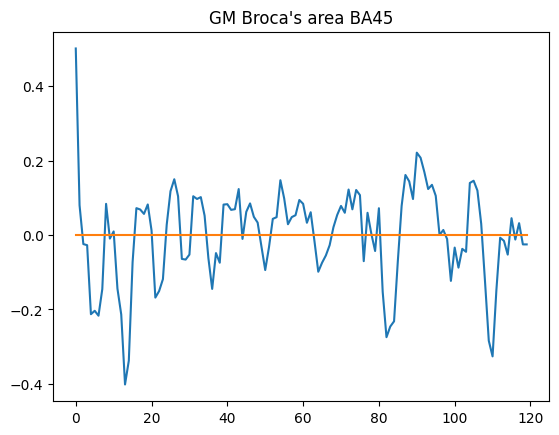

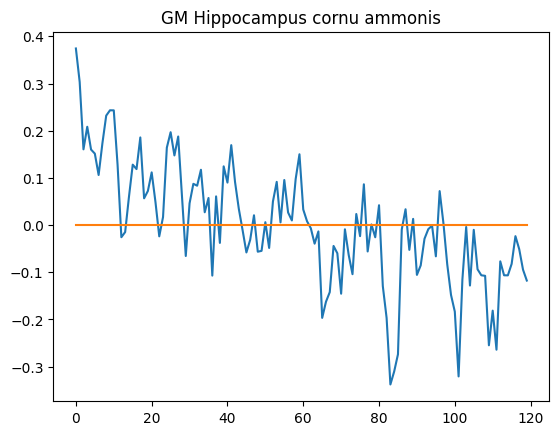

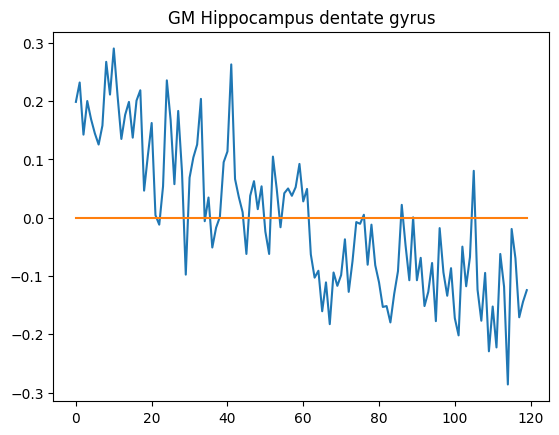

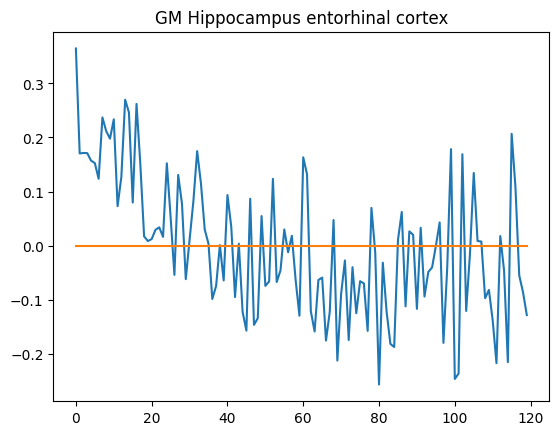

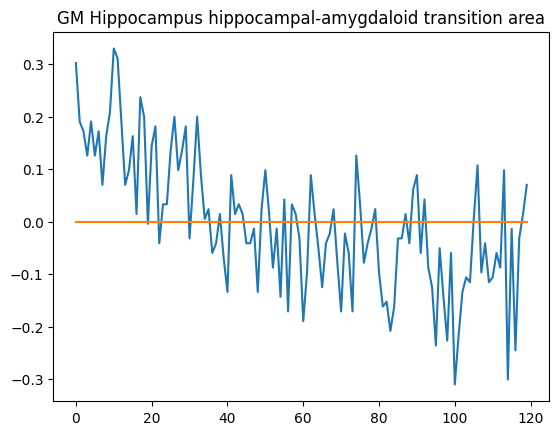

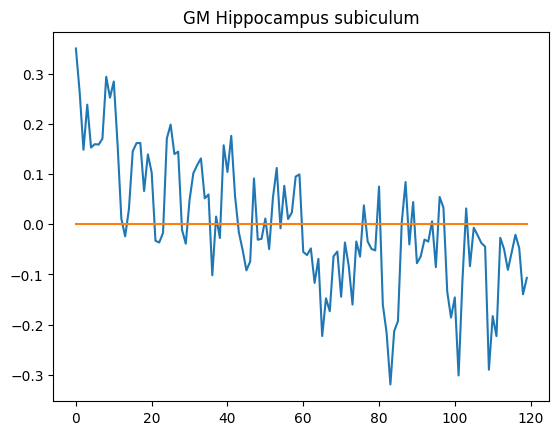

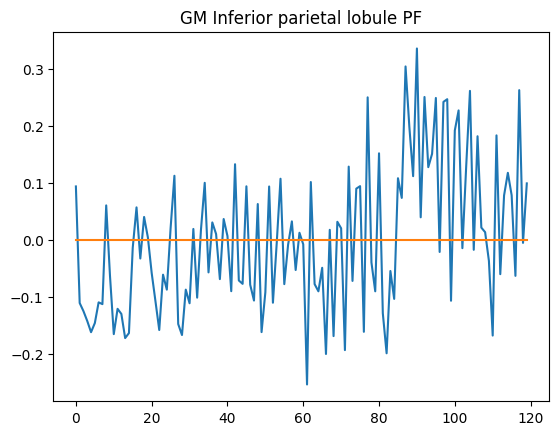

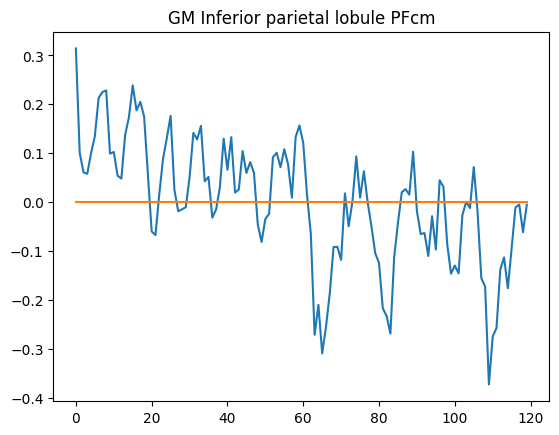

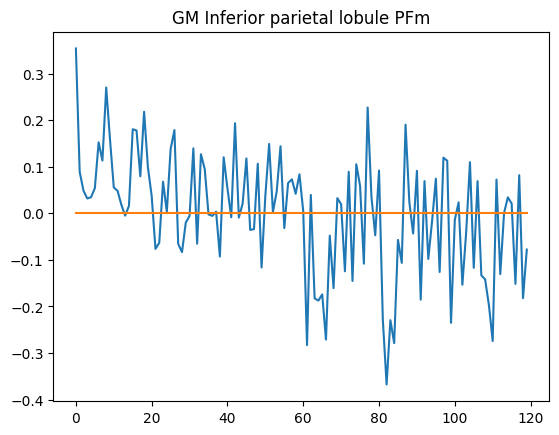

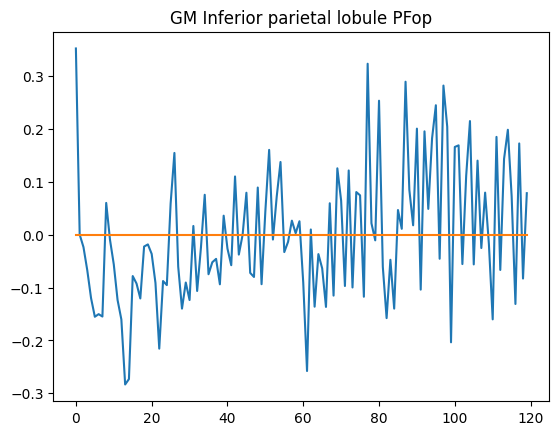

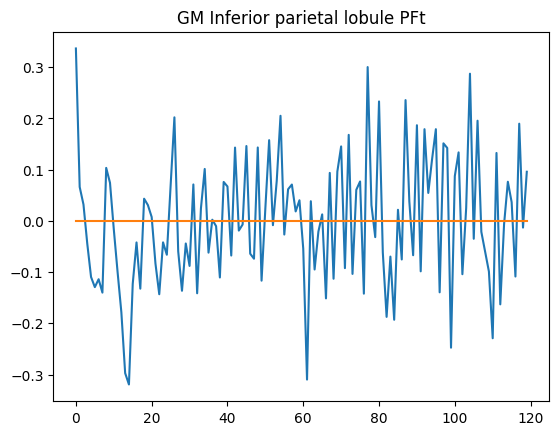

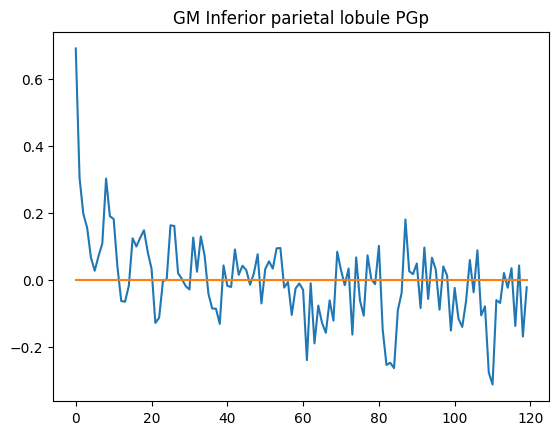

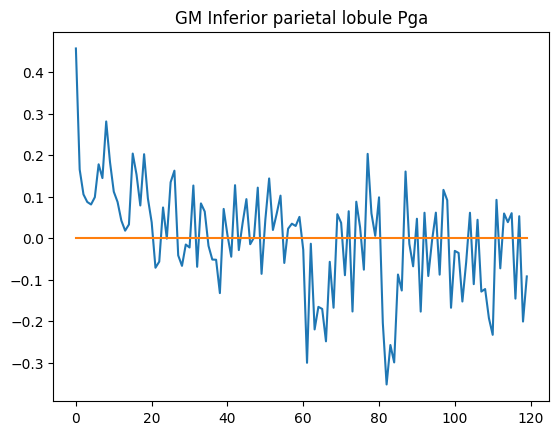

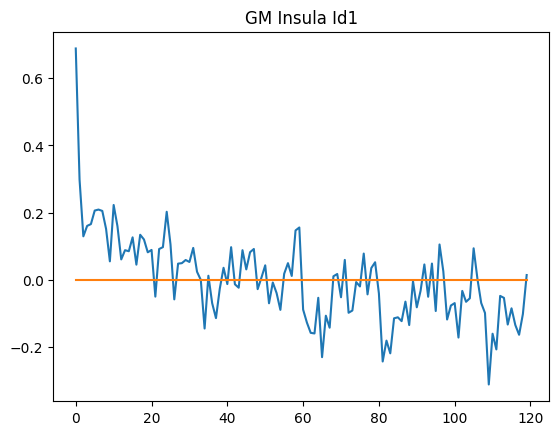

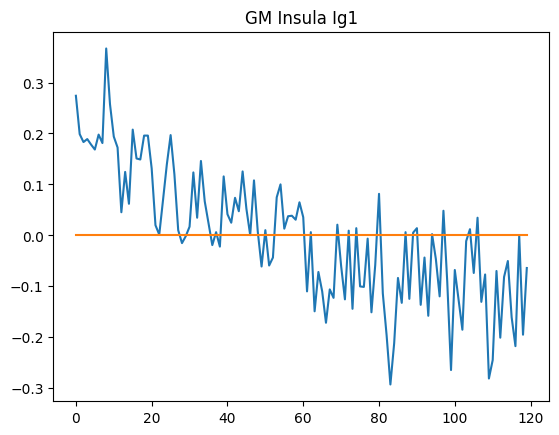

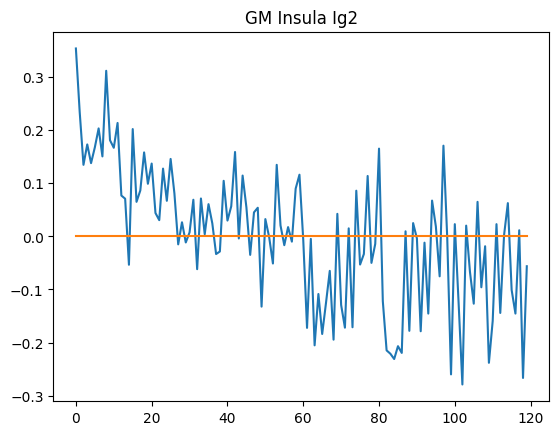

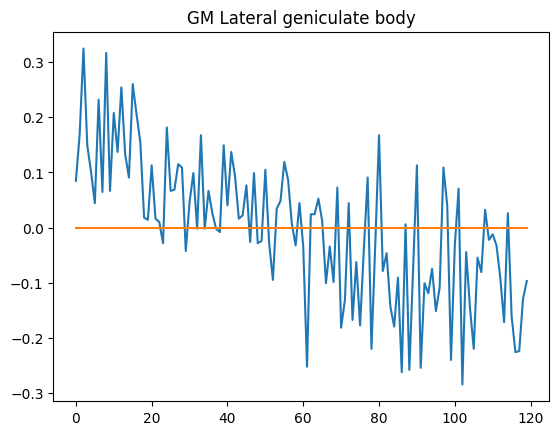

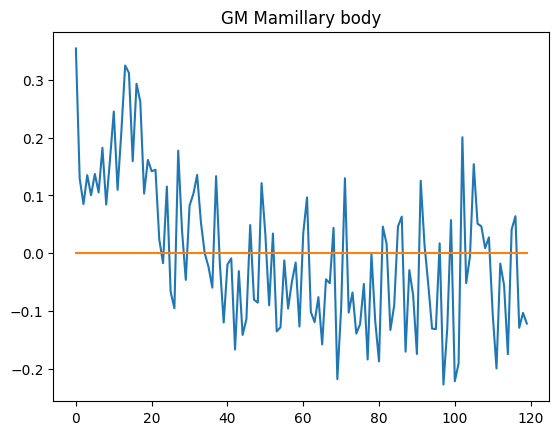

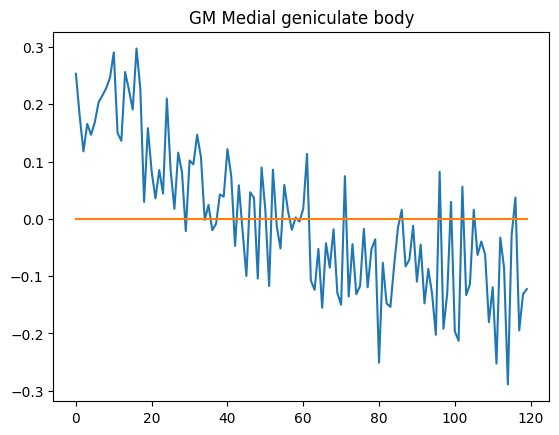

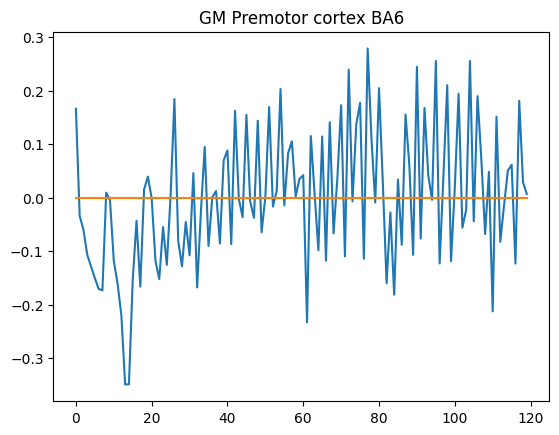

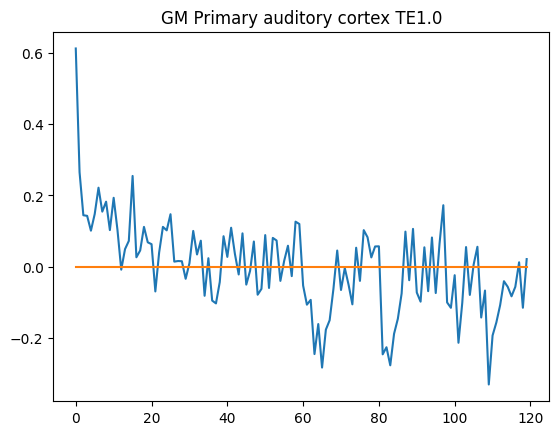

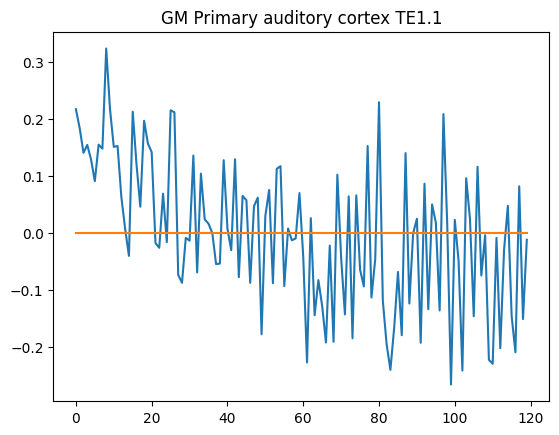

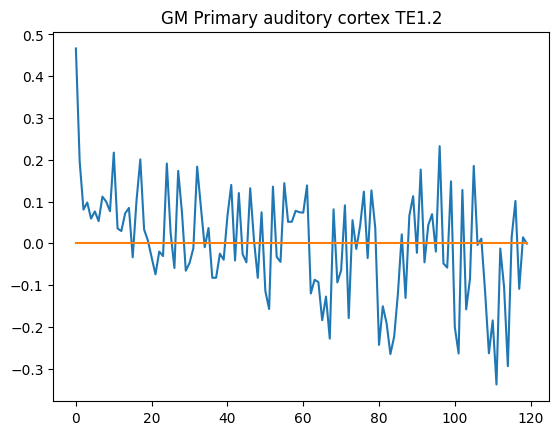

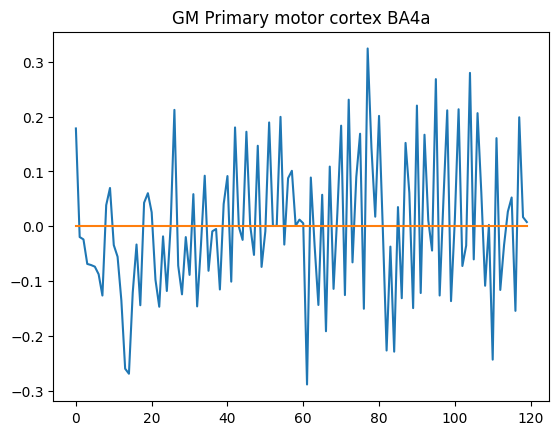

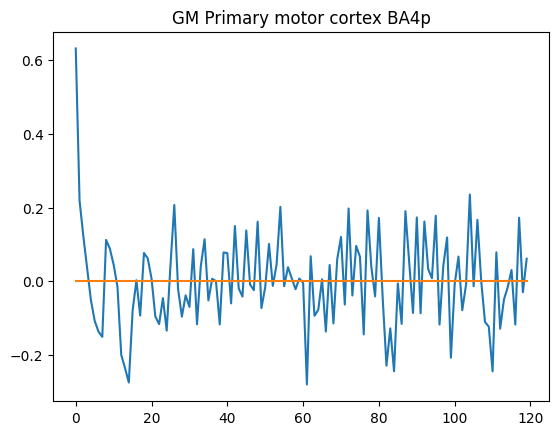

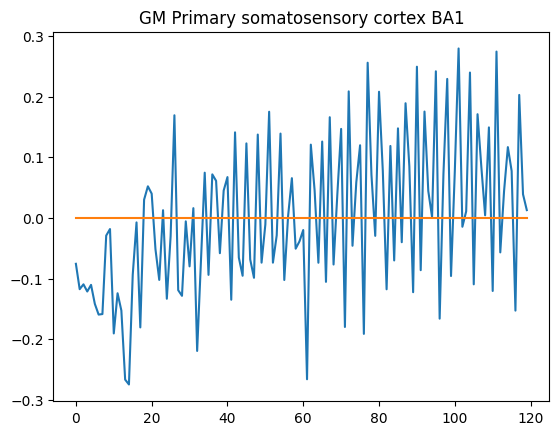

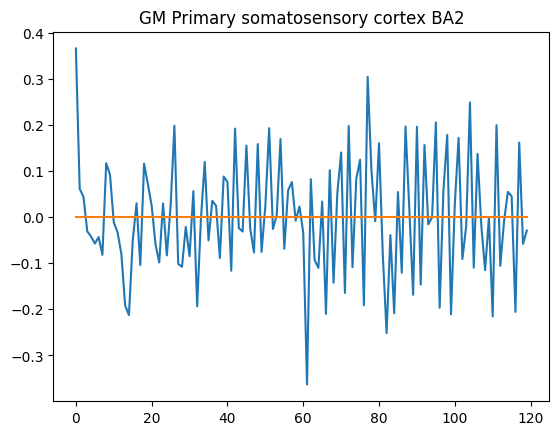

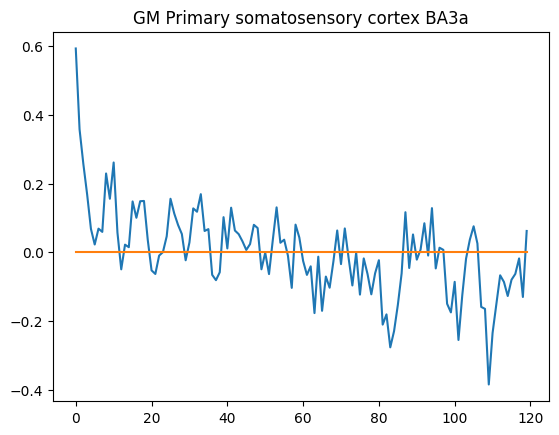

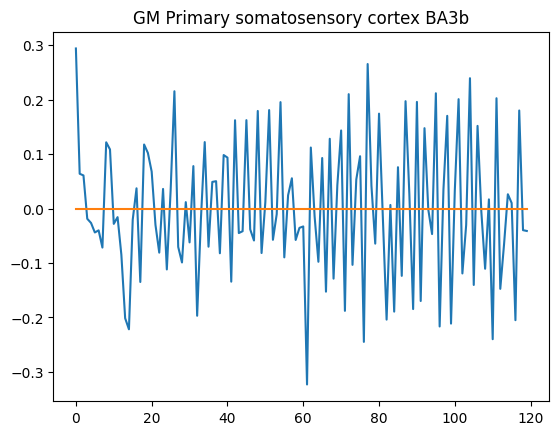

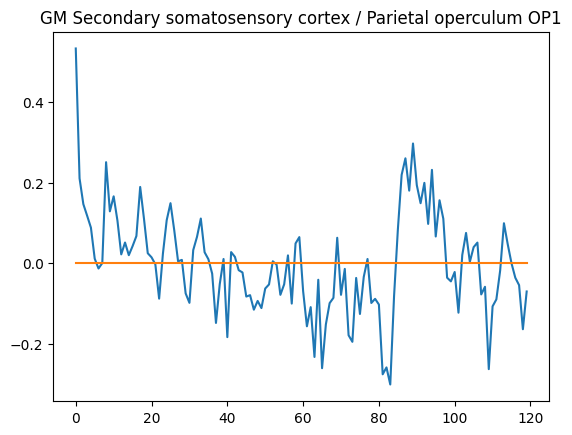

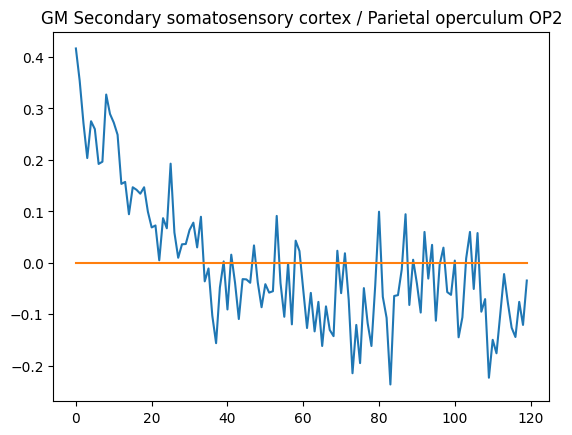

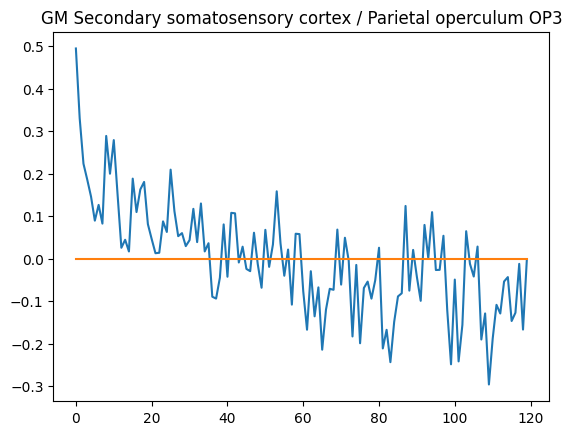

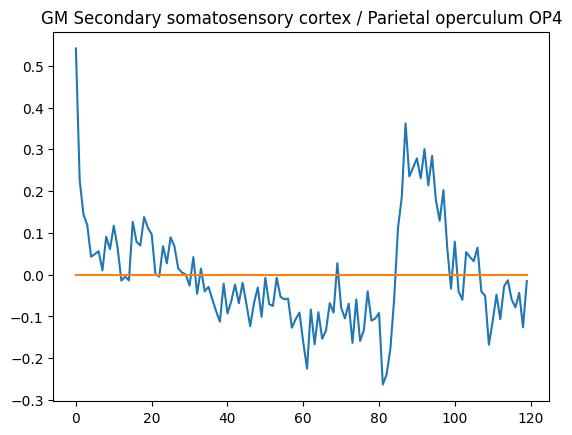

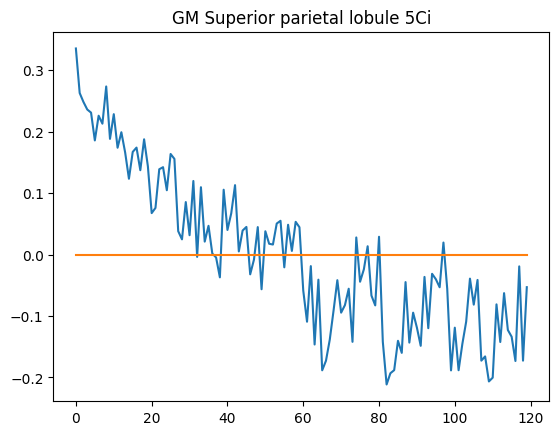

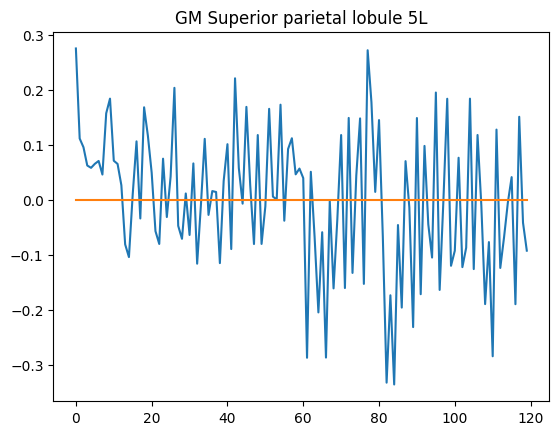

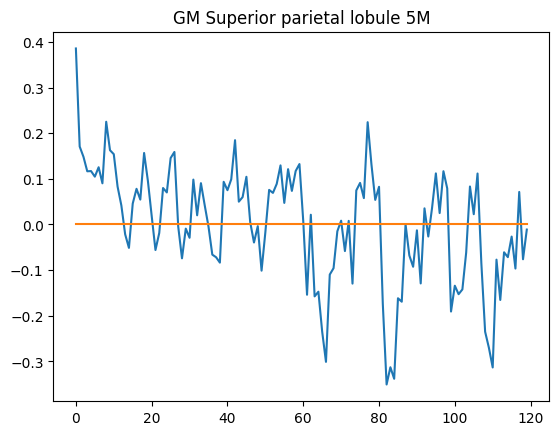

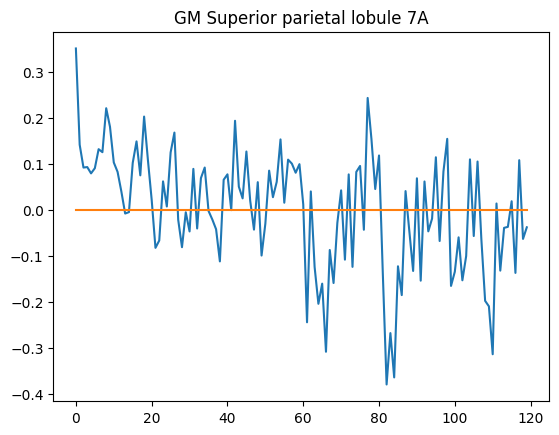

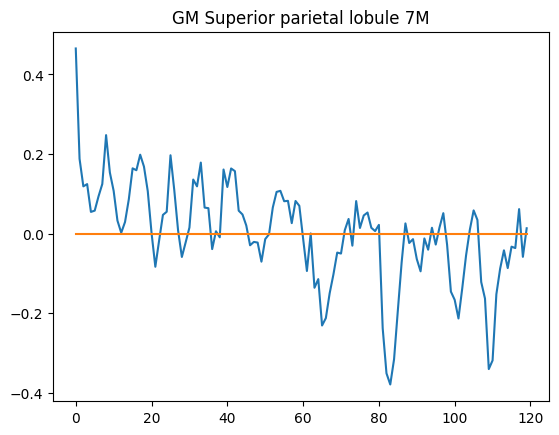

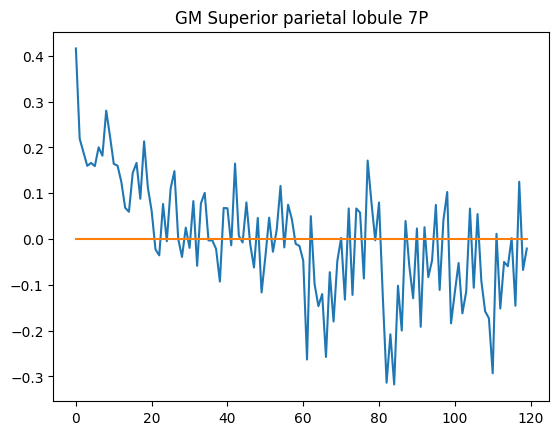

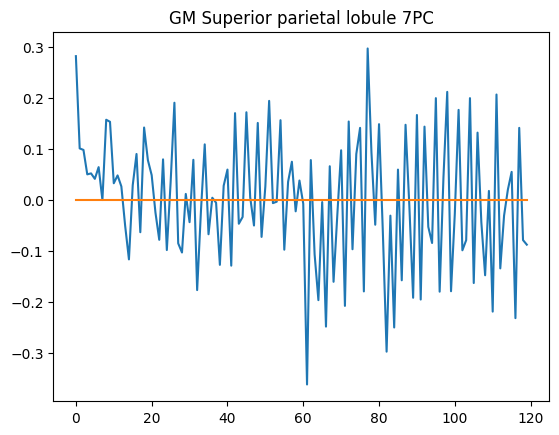

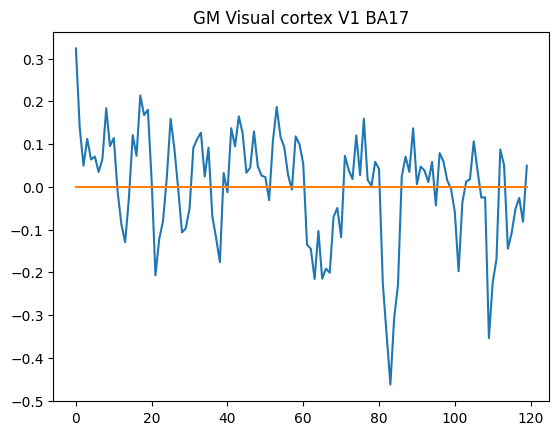

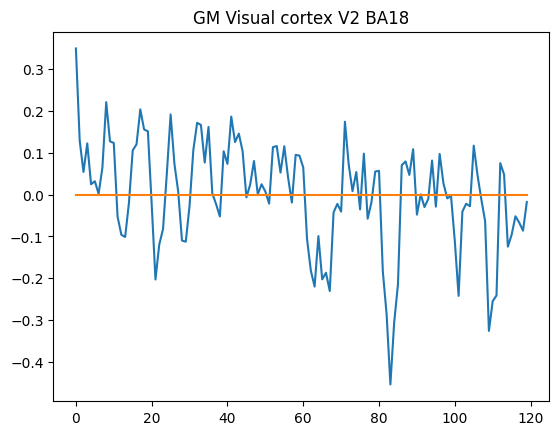

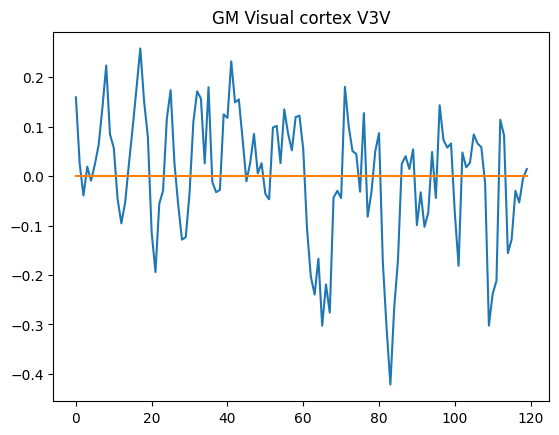

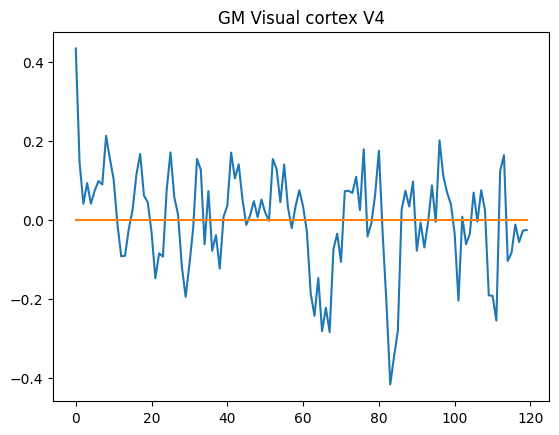

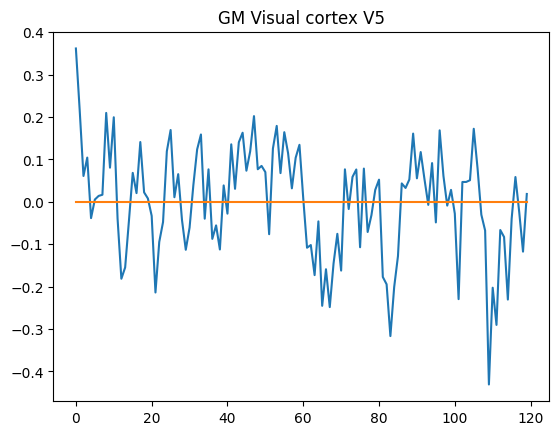

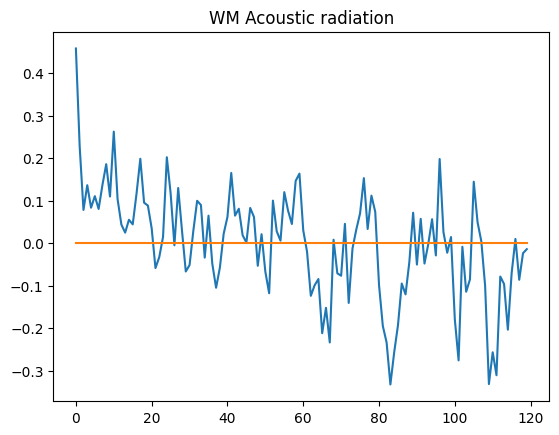

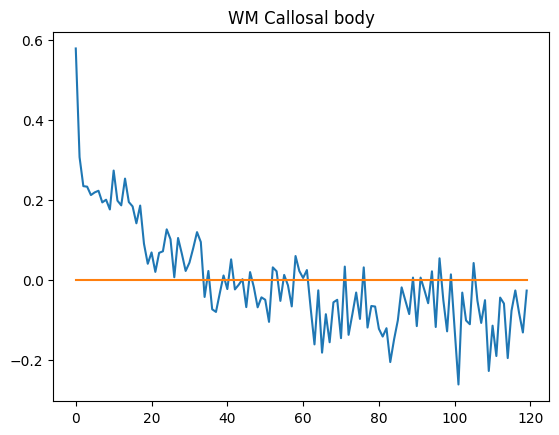

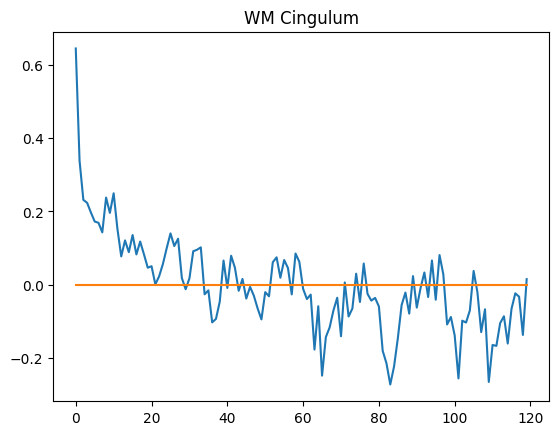

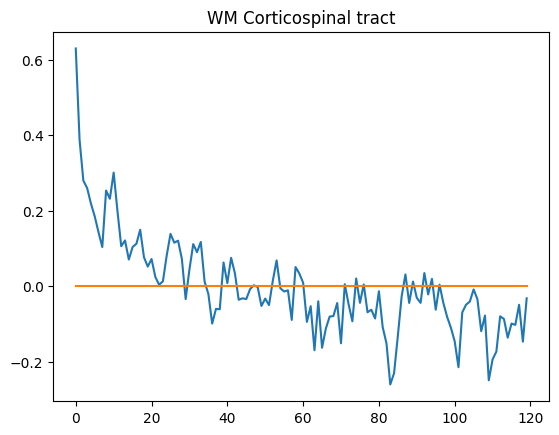

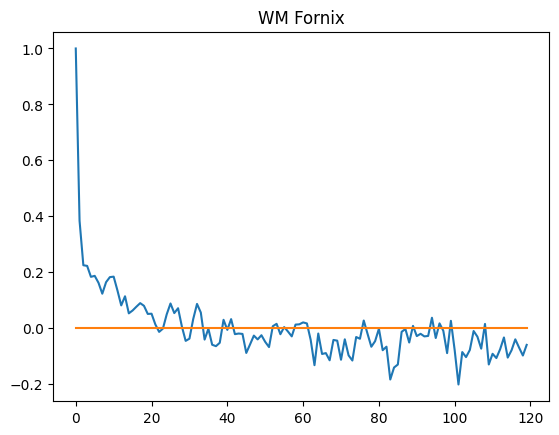

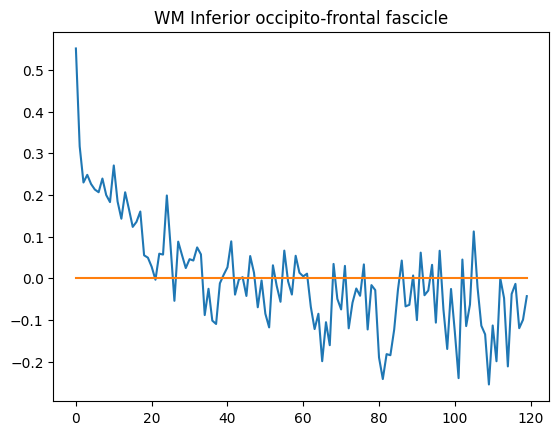

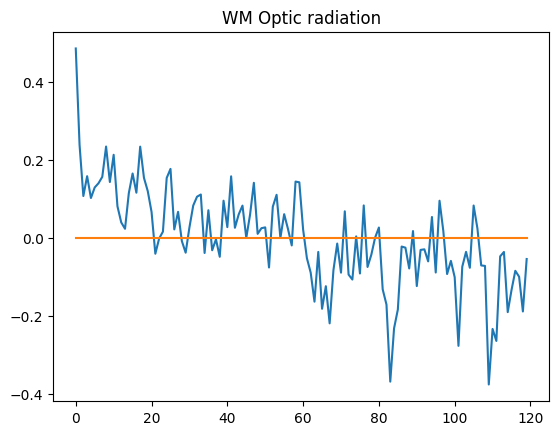

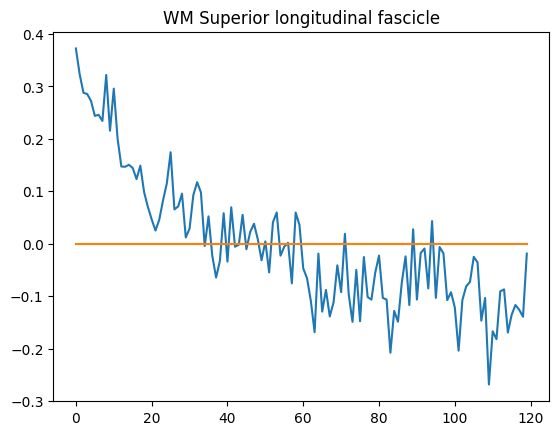

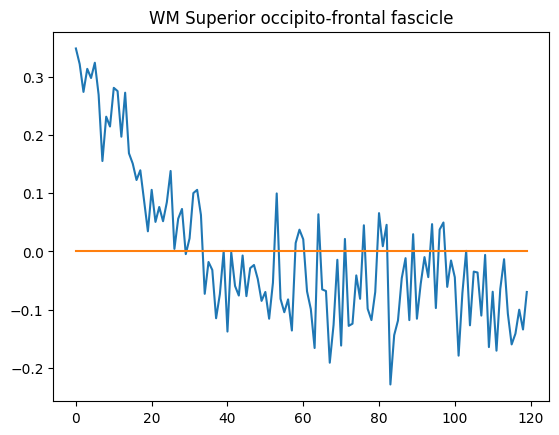

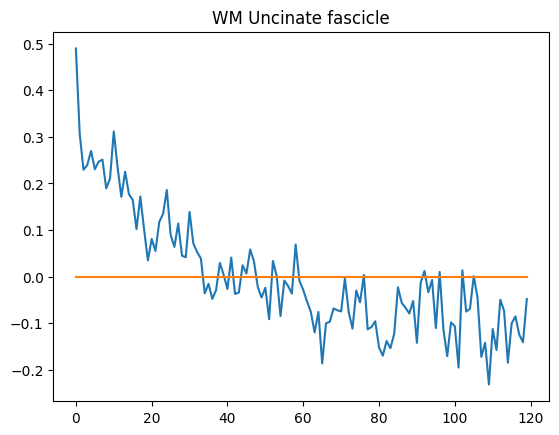



(120, 62)
(62, 120)


In [ ]:
time_series2 = masker2.fit_transform(smoothed_img)
time_series2 = time_series2/np.max(time_series2)
print(time_series2)

graph_time_series2 = time_series2.T
for i in range(len(graph_time_series2)):
  a = plt.plot(range(120), graph_time_series2[i])
  b = plt.plot(range(120), [0]*120)
  plt.title(labels2[i])
  plt.show(a, b)

print("\n")
print(time_series2.shape)
print(graph_time_series2.shape)

More atlases can be found [here](https://nilearn.github.io/stable/modules/reference.html#atlases), and their specific requirements can be found on their individual documentation pages.

## Connectivity Matrices

In [ ]:
#from nilearn.connectome import ConnectivityMeasure

#correlation_measure = ConnectivityMeasure(kind='correlation')
#correlation_matrix = correlation_measure.fit_transform([time_series])[0]

#np.fill_diagonal(correlation_matrix, 0)
#plotting.plot_matrix(correlation_matrix, figure=(10, 10), labels=labels, vmax=0.8, vmin=-0.8, reorder=True)
#plotting.show()

In [ ]:
#correlation_measure2 = ConnectivityMeasure(kind='correlation')
#correlation_matrix2 = correlation_measure2.fit_transform([time_series2])[0]

#np.fill_diagonal(correlation_matrix2, 0)
#plotting.plot_matrix(correlation_matrix2, figure=(10, 10), labels=labels2, vmax=0.8, vmin=-0.8, reorder=True)
#plotting.show()

## Statistical Analysis

In [ ]:
ts_df = pd.DataFrame(time_series, columns = labels)
ts_df.describe()

Frontal Pole  Insular Cortex  Superior Frontal Gyrus  \
count    120.000000      120.000000              120.000000   
mean       0.153226        0.883421                0.218700   
std        0.003003        0.006153                0.012826   
min        0.142542        0.869133                0.181750   
25%        0.151815        0.879269                0.210508   
50%        0.153879        0.883149                0.219108   
75%        0.155234        0.885885                0.227559   
max        0.160283        0.910225                0.246161   

       Middle Frontal Gyrus  Inferior Frontal Gyrus, pars triangularis  \
count            120.000000                                 120.000000   
mean               0.303171                                   0.475438   
std                0.011104                                   0.005184   
min                0.268702                                   0.455602   
25%                0.296695                                   0.473237   
50%                0.303821                                   0.476453   
75%                0.310681                                   0.478568   
max                0.325758                                   0.488078   

       Inferior Frontal Gyrus, pars opercularis  Precentral Gyrus  \
count                                120.000000        120.000000   
mean                                   0.576024          0.353899   
std                                    0.004325          0.006685   
min                                    0.561993          0.336381   
25%                                    0.573681          0.349248   
50%                                    0.576128          0.353948   
75%                                    0.578769          0.358185   
max                                    0.589609          0.367940   

       Temporal Pole  Superior Temporal Gyrus, anterior division  \
count     120.000000                                  120.000000   
mean        0.352499                                    0.381230   
std         0.005068                                    0.006359   
min         0.338646                                    0.367592   
25%         0.348803                                    0.377561   
50%         0.351708                                    0.380905   
75%         0.356255                                    0.383650   
max         0.366957                                    0.399954   

       Superior Temporal Gyrus, posterior division  ...  \
count                                   120.000000  ...   
mean                                      0.491294  ...   
std                                       0.005975  ...   
min                                       0.474670  ...   
25%                                       0.487770  ...   
50%                                       0.491973  ...   
75%                                       0.494615  ...   
max                                       0.506993  ...   

       Temporal Occipital Fusiform Cortex  Occipital Fusiform Gyrus  \
count                          120.000000                120.000000   
mean                             0.899811                  0.956806   
std                              0.002699                  0.005741   
min                              0.891067                  0.937320   
25%                              0.898154                  0.954273   
50%                              0.899609                  0.957634   
75%                              0.901677                  0.960373   
max                              0.909394                  0.968691   

       Frontal Operculum Cortex  Central Opercular Cortex  \
count                120.000000                120.000000   
mean                   0.806148                  0.787415   
std                    0.006932                  0.004289   
min                    0.790662                  0.776756   
25%                    0.801430                  0.784665   

In [ ]:
np.median(time_series, axis = 0)

array([0.15387854, 0.88314855, 0.21910827, 0.30382058, 0.4764531 ,
       0.5761279 , 0.35394788, 0.35170764, 0.3809048 , 0.49197322,
       0.41788077, 0.43577382, 0.6383488 , 0.42379212, 0.40219417,
       0.7048451 , 0.28714055, 0.40418756, 0.2155031 , 0.4421022 ,
       0.61470526, 0.7190851 , 0.8609185 , 0.95480037, 0.03397128,
       0.6013189 , 0.24747357, 0.6194037 , 0.8930695 , 0.91323245,
       0.78889775, 0.87161195, 0.3050838 , 0.69381154, 0.943306  ,
       0.9837904 , 0.6698537 , 0.8764461 , 0.899609  , 0.95763445,
       0.8048181 , 0.787451  , 0.74709797, 0.78906083, 0.86587644,
       0.6602003 , 0.94779956, 0.8842603 ], dtype=float32)

In [ ]:
median_MSE = np.sum(np.median(time_series, axis = 0)**2)
median_MSE

21.295692

# Further Preprocessing

## Fetching Data

This is commented out for now because I have the data from the next section stored in CSVs, so there's no need to wait 30 minutes every time for this section to load.

In [ ]:
#from nilearn.datasets import fetch_abide_pcp

s = 40
# We specify the site and number of subjects we want to download
#abideA = fetch_abide_pcp(derivatives=['func_preproc'],
#                        SITE_ID=['NYU'], DX_GROUP={1}, n_subjects=s)  #58

#abideH = fetch_abide_pcp(derivatives=['func_preproc'],
#                        SITE_ID=['NYU'], DX_GROUP={2}, n_subjects=s)  #58


In [ ]:
# To get the functional dataset, we have to retrieve the variable 'func_preproc'
#func = abideA.func_preproc + abideH.func_preproc
#abide_phen = pd.concat([pd.DataFrame(abideA.phenotypic), pd.DataFrame(abideH.phenotypic)], ignore_index = True)
# We can also look at where the data is loaded
#print(func[1])

In [ ]:
#abide_phen

In [ ]:
#abide_phen[abide_phen['AGE_AT_SCAN'] > 10]

In [ ]:
#y = 2 - np.array(abide_phen['DX_GROUP'])
#y

In [ ]:
#func

In [ ]:
##smoothed_imgs = image.smooth_img(cull, fwhm = 1)
##_ = image.get_data(smoothed_imgs)

##smoothed_imgs = image.smooth_img(func, fwhm = 1)

In [ ]:
##print(type(smoothed_imgs[0]))
##print(smoothed_imgs[0].affine)
##print(smoothed_imgs[0].header)

## Load Time Series

In [ ]:
#time_seriesNYU = np.array([np.transpose(masker.fit_transform(i)) for i in smoothed_imgs])

#time_seriesNYU.tofile('drive/MyDrive/TS_NYU.csv', sep = ',')
#time_seriesNYU = np.genfromtxt('drive/MyDrive/TS_NYU.csv', delimiter=',')

#for i in range(len(time_seriesNYU)):
#  zwe = pd.DataFrame(time_seriesNYU[i])
#  zwe.to_csv("drive/MyDrive/TS_NYU/"+str(i)+".csv", header = False, index = False)

time_seriesNYU = np.resize(np.loadtxt("drive/MyDrive/TS_NYU/0.csv",
                 delimiter=",", dtype=float), (1,48,176))

for i in range(1,80):
  time_seriesNYU = np.append(time_seriesNYU,np.resize(np.loadtxt("drive/MyDrive/TS_NYU/"+str(i)+".csv",
                 delimiter=",", dtype=float), (1,48,176)), axis = 0)

In [ ]:
time_seriesNYU.shape

(80, 48, 176)

In [ ]:
for i in labels:
  print(i)

Frontal Pole
Insular Cortex
Superior Frontal Gyrus
Middle Frontal Gyrus
Inferior Frontal Gyrus, pars triangularis
Inferior Frontal Gyrus, pars opercularis
Precentral Gyrus
Temporal Pole
Superior Temporal Gyrus, anterior division
Superior Temporal Gyrus, posterior division
Middle Temporal Gyrus, anterior division
Middle Temporal Gyrus, posterior division
Middle Temporal Gyrus, temporooccipital part
Inferior Temporal Gyrus, anterior division
Inferior Temporal Gyrus, posterior division
Inferior Temporal Gyrus, temporooccipital part
Postcentral Gyrus
Superior Parietal Lobule
Supramarginal Gyrus, anterior division
Supramarginal Gyrus, posterior division
Angular Gyrus
Lateral Occipital Cortex, superior division
Lateral Occipital Cortex, inferior division
Intracalcarine Cortex
Frontal Medial Cortex
Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)
Subcallosal Cortex
Paracingulate Gyrus
Cingulate Gyrus, anterior division
Cingulate Gyrus, posterior division
Precuneous Cortex
C

In [ ]:
TS_OFC = time_seriesNYU[:,32]
TS_OFC.shape

# time series recording for OFC for all 80 subjects (length 176)

(80, 176)

In [ ]:
x = TS_OFC

In [ ]:
x.shape

(80, 176)

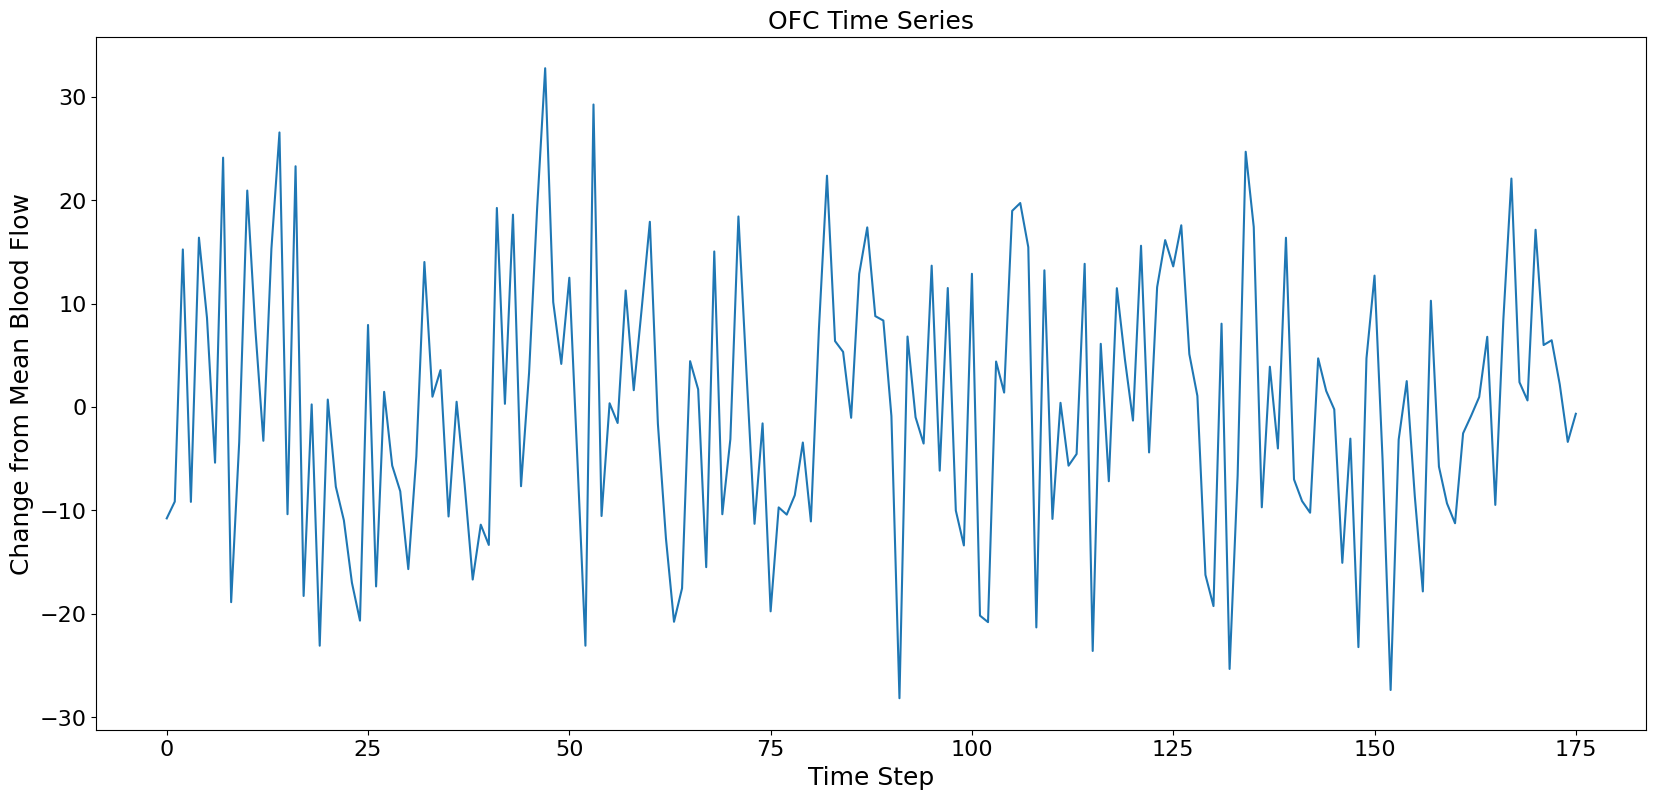

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(range(len(x[1])),x[1])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title("OFC Time Series", fontsize = 18)
plt.xlabel("Time Step", fontsize = 18)
plt.ylabel("Change from Mean Blood Flow", fontsize = 18)
plt.show()

In [ ]:
y = np.array([1]*40+[0]*40)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
n = len(y)

arr = np.arange(n)
np.random.shuffle(arr)
arr

array([ 3, 68, 48, 45,  5, 72, 15, 58, 76, 41, 21, 12, 66, 70,  4,  6, 35,
       40, 31, 37, 52, 59,  9, 20, 43, 60, 36, 30, 74, 16, 22, 10, 63,  7,
       29, 67, 71,  0, 39, 57, 11, 49, 14, 46, 27, 19, 65, 33, 50, 78, 42,
        2, 17, 51,  1, 24, 79, 34, 47, 77, 38, 13, 28, 75, 64, 23, 25, 62,
       44,  8, 18, 55, 54, 61, 32, 56, 53, 73, 69, 26])

In [ ]:
import math

X_train = x[arr[:math.floor(0.8 * n)]]
y_train = y[arr[:math.floor(0.8 * n)]]
X_test = x[arr[math.floor(0.8 * n):]]
y_test = y[arr[math.floor(0.8 * n):]]

#for i in arr:
#  print(x[i],y[i])

y_test

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
import sklearn
import xgboost

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn. dummy import DummyClassifier 
from sklearn. linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn. tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
from sklearn. ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

tup = (30,15,5,)

#[(30,15,5,),(20,50,20,4,)]

n = 80 
k = 1000
a = []

classifiers = [
    #DummyClassifier(strategy='stratified'),
    #LogisticRegression(),
    #KNeighborsClassifier(),
    #DecisionTreeClassifier(),
    #SVC(),
    #RandomForestClassifier(),
    #GaussianNB(),
    MLPClassifier(solver = 'sgd', hidden_layer_sizes = tup, activation = 'relu'),
    #GradientBoostingClassifier(),
    #AdaBoostClassifier(),
    #QuadraticDiscriminantAnalysis(),
    #XGBClassifier()
    MLPClassifier(solver = 'sgd', hidden_layer_sizes = tup, activation = 'relu'),
]

clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = tup, activation = 'relu')

#for clf in classifiers:
for i in range(k):

  arr = np.arange(n)
  np.random.shuffle(arr)

  X_train = x[arr[:math.floor(0.8 * n)]]
  y_train = y[arr[:math.floor(0.8 * n)]]
  X_test = x[arr[math.floor(0.8 * n):]]
  y_test = y[arr[math.floor(0.8 * n):]]  

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  #print(f"Accuracy of {type(clf).__name__}: {accuracy:.4f}")
  a.append([accuracy,precision,recall])

  if i % 100 == 0:
    print("Iteration", i)

Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900


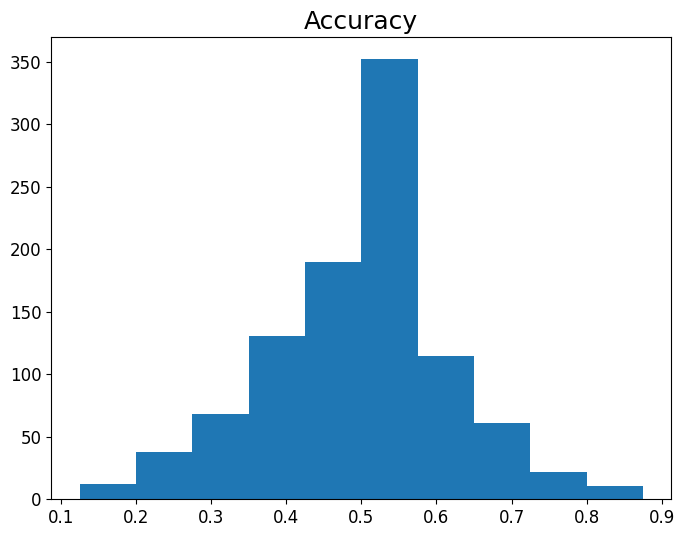

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(np.array(a)[:,0])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Accuracy", fontsize = 18)
plt.show()

In [ ]:
clf

MLPClassifier(hidden_layer_sizes=(30, 15, 5), solver='sgd')

In [ ]:
import pickle

# save
with open('/content/drive/MyDrive/model1.pkl','wb') as f:
    pickle.dump(clf,f)

# Keep Runtime Up

In [ ]:
while True:
  bvcx = 0

KeyboardInterrupt: ignored